## Predict water quality in terms of pH (median)

#### Load essential scientific libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io

#### Load matlab file and convert the data given (dict --> np.array --> pd.DataFrame)

In [2]:
water_data = scipy.io.loadmat("water_dataset.mat")

print(type(water_data))
print(water_data.keys())

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'X_tr', 'X_te', 'Y_tr', 'Y_te', 'location_group', 'features', 'location_ids'])


In [3]:
print(water_data['features'])

[[array(['Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius (Maximum)'],
        dtype='<U100')
  array(['pH, water, unfiltered, field, standard units (Maximum)'],
        dtype='<U54')
  array(['pH, water, unfiltered, field, standard units (Minimum)'],
        dtype='<U54')
  array(['Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius (Minimum)'],
        dtype='<U100')
  array(['Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius (Mean)'],
        dtype='<U97')
  array(['Dissolved oxygen, water, unfiltered, milligrams per liter (Maximum)'],
        dtype='<U67')
  array(['Dissolved oxygen, water, unfiltered, milligrams per liter (Mean)'],
        dtype='<U64')
  array(['Dissolved oxygen, water, unfiltered, milligrams per liter (Minimum)'],
        dtype='<U67')
  array(['Temperature, water, degrees Celsius (Mean)'], dtype='<U42')
  array(['Temperature, water, degrees

In [4]:
X_train = water_data['X_tr']
print(X_train)

[[array([[1.13060429e-03, 8.84615385e-01, 1.11984283e-03, 1.11328125e-03,
          6.77631579e-01, 8.41463415e-01, 7.65151515e-01, 7.87401575e-01,
          2.93750000e-01, 2.98076923e-01, 2.76162791e-01],
         [1.16959064e-03, 8.71794872e-01, 1.15913556e-03, 1.15234375e-03,
          7.03947368e-01, 8.29268293e-01, 7.72727273e-01, 7.95275591e-01,
          2.93750000e-01, 3.01282051e-01, 2.76162791e-01],
         [1.32553606e-03, 8.84615385e-01, 1.19842829e-03, 1.25000000e-03,
          6.77631579e-01, 8.53658537e-01, 7.50000000e-01, 7.55905512e-01,
          3.00000000e-01, 2.98076923e-01, 2.87790698e-01],
         [1.40935673e-02, 8.58974359e-01, 1.23772102e-03, 3.92578125e-03,
          6.97368421e-01, 8.29268293e-01, 7.72727273e-01, 7.71653543e-01,
          2.96875000e-01, 2.94871795e-01, 2.79069767e-01],
         [8.81091618e-02, 8.58974359e-01, 1.07662083e-02, 2.92968750e-02,
          6.84210526e-01, 8.53658537e-01, 7.65151515e-01, 7.55905512e-01,
          2.96875000e-01

In [5]:
X_TR = []
for i in range(0, 423):
  for j in range(0, 37):
    X_TR.append(X_train[0][i][j])

X_TR = np.array(X_TR)
print(X_TR.shape)
print(type(X_TR))

(15651, 11)
<class 'numpy.ndarray'>


In [6]:
df_X_tr = pd.DataFrame(X_TR, columns =['Specific condunctance, water, Max', 'pH, water, Max', 'pH, water, Min', 'Specific Conductance, water, Min', 'Specific Conductance, water, Mean', 'Dissolved Oxygen, water, Max', 'Dissolved Oxygen, water, Mean', 'Dissolved Oxygen, water, Min', 'Temp, water, Mean', 'Temp, water, Min', 'Temp, water, Max'])
df_X_tr

Specific condunctance, water, Max  pH, water, Max  pH, water, Min  \
0                               0.001131        0.884615        0.001120   
1                               0.001170        0.871795        0.001159   
2                               0.001326        0.884615        0.001198   
3                               0.014094        0.858974        0.001238   
4                               0.088109        0.858974        0.010766   
...                                  ...             ...             ...   
15646                           0.005049        0.910256        0.004676   
15647                           0.002456        0.884615        0.002417   
15648                           0.003821        0.935897        0.003615   
15649                           0.001287        0.897436        0.001277   
15650                           0.001267        0.935897        0.001238   

       Specific Conductance, water, Min  Specific Conductance, water, Mean  \
0                              0.001113                           0.677632   
1                              0.001152                           0.703947   
2                              0.001250                           0.677632   
3                              0.003926                           0.697368   
4                              0.029297                           0.684211   
...                                 ...                                ...   
15646                          0.004883                           0.888158   
15647                          0.002422                           0.644737   
15648                          0.003750                           0.559211   
15649                          0.001289                           0.631579   
15650                          0.001230                           0.611842   

       Dissolved Oxygen, water, Max  Dissolved Oxygen, water, Mean  \
0                          0.841463                       0.765152   
1                          0.829268                       0.772727   
2                          0.853659                       0.750000   
3                          0.829268                       0.772727   
4                          0.853659                       0.765152   
...                             ...                            ...   
15646                      0.939024                       0.719697   
15647                      0.865854                       0.651515   
15648                      0.890244                       0.636364   
15649                      0.853659                       0.712121   
15650                      0.890244                       0.681818   

       Dissolved Oxygen, water, Min  Temp, water, Mean  Temp, water, Min  \
0                          0.787402           0.293750          0.298077   
1                          0.795276           0.293750          0.301282   
2                          0.755906           0.300000          0.298077   
3                          0.771654           0.296875          0.294872   
4                          0.755906           0.296875          0.291667   
...                             ...                ...               ...   
15646                      0.535433           0.553125          0.490385   
15647                      0.622047           0.556250          0.522436   
15648                      0.645669           0.571875          0.554487   
15649                      0.724409           0.468750          0.464744   
15650                      0.692913           0.515625          0.503205   

       Temp, water, Max  
0              0.276163  
1              0.276163  
2              0.287791  
3              0.279070  
4              0.281977  
...                 ...  
15646          0.584302  
15647          0.584302  
15648          0.561047  
15649          0.462209  
15650          0.523256  

[15651 rows x 11 columns]

In [7]:
X_test = water_data['X_te']
print(X_test)

[[array([[0.00230019, 0.91025641, 0.00198428, 0.00205078, 0.57894737,
          0.86585366, 0.65151515, 0.66141732, 0.571875  , 0.57371795,
          0.54360465],
         [0.24366472, 0.92307692, 0.00253438, 0.11054688, 0.57236842,
          0.90243902, 0.57575758, 0.50393701, 0.553125  , 0.54166667,
          0.5377907 ],
         [0.208577  , 0.88461538, 0.00795678, 0.09550781, 0.56578947,
          0.8902439 , 0.58333333, 0.53543307, 0.55625   , 0.54487179,
          0.55232558],
         [0.39181287, 0.93589744, 0.0611002 , 0.22851562, 0.51973684,
          0.92682927, 0.53030303, 0.51968504, 0.5375    , 0.52884615,
          0.52616279],
         [0.49707602, 0.96153846, 0.24361493, 0.35351562, 0.48684211,
          0.92682927, 0.53030303, 0.51968504, 0.53125   , 0.52884615,
          0.51453488],
         [0.14658869, 0.91025641, 0.00844794, 0.03945312, 0.51315789,
          0.87804878, 0.54545455, 0.51968504, 0.56875   , 0.54807692,
          0.55232558],
         [0.22417154, 

In [8]:
X_TE = []
for i in range(0, 282):
  for j in range(0, 37):
    X_TE.append(X_test[0][i][j])

X_TE = np.array(X_TE)
print(X_TE.shape) 
print(type(X_TE))

(10434, 11)
<class 'numpy.ndarray'>


In [9]:
df_X_te = pd.DataFrame(X_TE, columns = ['Specific condunctance, water, Max', 'pH, water, Max', 'pH, water, Min', 'Specific Conductance, water, Min', 'Specific Conductance, water, Mean', 'Dissolved Oxygen, water, Max', 'Dissolved Oxygen, water, Mean', 'Dissolved Oxygen, water, Min', 'Temp, water, Mean', 'Temp, water, Min', 'Temp, water, Max'])
df_X_te

Specific condunctance, water, Max  pH, water, Max  pH, water, Min  \
0                               0.002300        0.910256        0.001984   
1                               0.243665        0.923077        0.002534   
2                               0.208577        0.884615        0.007957   
3                               0.391813        0.935897        0.061100   
4                               0.497076        0.961538        0.243615   
...                                  ...             ...             ...   
10429                           0.006238        0.935897        0.006130   
10430                           0.003138        0.858974        0.002967   
10431                           0.003840        0.948718        0.003399   
10432                           0.001287        0.910256        0.001277   
10433                           0.001209        0.897436        0.001198   

       Specific Conductance, water, Min  Specific Conductance, water, Mean  \
0                              0.002051                           0.578947   
1                              0.110547                           0.572368   
2                              0.095508                           0.565789   
3                              0.228516                           0.519737   
4                              0.353516                           0.486842   
...                                 ...                                ...   
10429                          0.006172                           0.914474   
10430                          0.003047                           0.769737   
10431                          0.003672                           0.750000   
10432                          0.001289                           0.750000   
10433                          0.001211                           0.835526   

       Dissolved Oxygen, water, Max  Dissolved Oxygen, water, Mean  \
0                          0.865854                       0.651515   
1                          0.902439                       0.575758   
2                          0.890244                       0.583333   
3                          0.926829                       0.530303   
4                          0.926829                       0.530303   
...                             ...                            ...   
10429                      0.902439                       0.977273   
10430                      0.829268                       0.856061   
10431                      0.902439                       0.840909   
10432                      0.865854                       0.856061   
10433                      0.853659                       0.916667   

       Dissolved Oxygen, water, Min  Temp, water, Mean  Temp, water, Min  \
0                          0.661417           0.571875          0.573718   
1                          0.503937           0.553125          0.541667   
2                          0.535433           0.556250          0.544872   
3                          0.519685           0.537500          0.528846   
4                          0.519685           0.531250          0.528846   
...                             ...                ...               ...   
10429                      0.929134           0.068750          0.022436   
10430                      0.834646           0.093750          0.044872   
10431                      0.850394           0.215625          0.195513   
10432                      0.874016           0.225000          0.208333   
10433                      0.897638           0.128125          0.067308   

       Temp, water, Max  
0              0.543605  
1              0.537791  
2              0.552326  
3              0.526163  
4              0.514535  
...                 ...  
10429          0.119186  
10430          0.127907  
10431          0.238372  
10432          0.232558  
10433          0.183140  

[10434 rows x 11 columns]

In [10]:
Y_train = water_data['Y_tr']
Y_TR = np.reshape(Y_train, (15651, 1))
print(Y_TR)
print(Y_TR.shape)

[[0.64814815]
 [0.64814815]
 [0.64814815]
 ...
 [0.68518519]
 [0.67592593]
 [0.67592593]]
(15651, 1)


In [11]:
df_Y_tr = pd.DataFrame(Y_TR, columns = ['pH, water, (Median)'])
df_Y_tr

pH, water, (Median)
0                 0.648148
1                 0.648148
2                 0.648148
3                 0.648148
4                 0.648148
...                    ...
15646             0.703704
15647             0.694444
15648             0.685185
15649             0.675926
15650             0.675926

[15651 rows x 1 columns]

In [12]:
Y_test = water_data['Y_te']
Y_TE = np.reshape(Y_test, (10434, 1))
print(Y_TE)
print(Y_TE.shape)

[[0.66666667]
 [0.66666667]
 [0.65740741]
 ...
 [0.65740741]
 [0.64814815]
 [0.65740741]]
(10434, 1)


In [13]:
df_Y_te = pd.DataFrame(Y_TE, columns = ['pH, water, (Median)'])
df_Y_te

pH, water, (Median)
0                 0.666667
1                 0.666667
2                 0.657407
3                 0.657407
4                 0.657407
...                    ...
10429             0.648148
10430             0.657407
10431             0.657407
10432             0.648148
10433             0.657407

[10434 rows x 1 columns]

#### Concatenate (df_X_tr, df_Y_tr) and (df_X_te, df_Y_te) respectively to analyze the data

In [14]:
df_train = pd.concat([df_X_tr, df_Y_tr], axis = 1)
df_train

Specific condunctance, water, Max  pH, water, Max  pH, water, Min  \
0                               0.001131        0.884615        0.001120   
1                               0.001170        0.871795        0.001159   
2                               0.001326        0.884615        0.001198   
3                               0.014094        0.858974        0.001238   
4                               0.088109        0.858974        0.010766   
...                                  ...             ...             ...   
15646                           0.005049        0.910256        0.004676   
15647                           0.002456        0.884615        0.002417   
15648                           0.003821        0.935897        0.003615   
15649                           0.001287        0.897436        0.001277   
15650                           0.001267        0.935897        0.001238   

       Specific Conductance, water, Min  Specific Conductance, water, Mean  \
0                              0.001113                           0.677632   
1                              0.001152                           0.703947   
2                              0.001250                           0.677632   
3                              0.003926                           0.697368   
4                              0.029297                           0.684211   
...                                 ...                                ...   
15646                          0.004883                           0.888158   
15647                          0.002422                           0.644737   
15648                          0.003750                           0.559211   
15649                          0.001289                           0.631579   
15650                          0.001230                           0.611842   

       Dissolved Oxygen, water, Max  Dissolved Oxygen, water, Mean  \
0                          0.841463                       0.765152   
1                          0.829268                       0.772727   
2                          0.853659                       0.750000   
3                          0.829268                       0.772727   
4                          0.853659                       0.765152   
...                             ...                            ...   
15646                      0.939024                       0.719697   
15647                      0.865854                       0.651515   
15648                      0.890244                       0.636364   
15649                      0.853659                       0.712121   
15650                      0.890244                       0.681818   

       Dissolved Oxygen, water, Min  Temp, water, Mean  Temp, water, Min  \
0                          0.787402           0.293750          0.298077   
1                          0.795276           0.293750          0.301282   
2                          0.755906           0.300000          0.298077   
3                          0.771654           0.296875          0.294872   
4                          0.755906           0.296875          0.291667   
...                             ...                ...               ...   
15646                      0.535433           0.553125          0.490385   
15647                      0.622047           0.556250          0.522436   
15648                      0.645669           0.571875          0.554487   
15649                      0.724409           0.468750          0.464744   
15650                      0.692913           0.515625          0.503205   

       Temp, water, Max  pH, water, (Median)  
0              0.276163             0.648148  
1              0.276163             0.648148  
2              0.287791             0.648148  
3              0.279070             0.648148  
4              0.281977             0.648148  
...                 ...                  ...  
15646          0.584302             0.703704  
15647          0.584302    

In [15]:
df_test = pd.concat([df_X_te, df_Y_te], axis = 1)
df_test

Specific condunctance, water, Max  pH, water, Max  pH, water, Min  \
0                               0.002300        0.910256        0.001984   
1                               0.243665        0.923077        0.002534   
2                               0.208577        0.884615        0.007957   
3                               0.391813        0.935897        0.061100   
4                               0.497076        0.961538        0.243615   
...                                  ...             ...             ...   
10429                           0.006238        0.935897        0.006130   
10430                           0.003138        0.858974        0.002967   
10431                           0.003840        0.948718        0.003399   
10432                           0.001287        0.910256        0.001277   
10433                           0.001209        0.897436        0.001198   

       Specific Conductance, water, Min  Specific Conductance, water, Mean  \
0                              0.002051                           0.578947   
1                              0.110547                           0.572368   
2                              0.095508                           0.565789   
3                              0.228516                           0.519737   
4                              0.353516                           0.486842   
...                                 ...                                ...   
10429                          0.006172                           0.914474   
10430                          0.003047                           0.769737   
10431                          0.003672                           0.750000   
10432                          0.001289                           0.750000   
10433                          0.001211                           0.835526   

       Dissolved Oxygen, water, Max  Dissolved Oxygen, water, Mean  \
0                          0.865854                       0.651515   
1                          0.902439                       0.575758   
2                          0.890244                       0.583333   
3                          0.926829                       0.530303   
4                          0.926829                       0.530303   
...                             ...                            ...   
10429                      0.902439                       0.977273   
10430                      0.829268                       0.856061   
10431                      0.902439                       0.840909   
10432                      0.865854                       0.856061   
10433                      0.853659                       0.916667   

       Dissolved Oxygen, water, Min  Temp, water, Mean  Temp, water, Min  \
0                          0.661417           0.571875          0.573718   
1                          0.503937           0.553125          0.541667   
2                          0.535433           0.556250          0.544872   
3                          0.519685           0.537500          0.528846   
4                          0.519685           0.531250          0.528846   
...                             ...                ...               ...   
10429                      0.929134           0.068750          0.022436   
10430                      0.834646           0.093750          0.044872   
10431                      0.850394           0.215625          0.195513   
10432                      0.874016           0.225000          0.208333   
10433                      0.897638           0.128125          0.067308   

       Temp, water, Max  pH, water, (Median)  
0              0.543605             0.666667  
1              0.537791             0.666667  
2              0.552326             0.657407  
3              0.526163             0.657407  
4              0.514535             0.657407  
...                 ...                  ...  
10429          0.119186             0.648148  
10430          0.127907    

#### Analyse the training data (EDA)

In [16]:
df_train.head()

Specific condunctance, water, Max  pH, water, Max  pH, water, Min  \
0                           0.001131        0.884615        0.001120   
1                           0.001170        0.871795        0.001159   
2                           0.001326        0.884615        0.001198   
3                           0.014094        0.858974        0.001238   
4                           0.088109        0.858974        0.010766   

   Specific Conductance, water, Min  Specific Conductance, water, Mean  \
0                          0.001113                           0.677632   
1                          0.001152                           0.703947   
2                          0.001250                           0.677632   
3                          0.003926                           0.697368   
4                          0.029297                           0.684211   

   Dissolved Oxygen, water, Max  Dissolved Oxygen, water, Mean  \
0                      0.841463                       0.765152   
1                      0.829268                       0.772727   
2                      0.853659                       0.750000   
3                      0.829268                       0.772727   
4                      0.853659                       0.765152   

   Dissolved Oxygen, water, Min  Temp, water, Mean  Temp, water, Min  \
0                      0.787402           0.293750          0.298077   
1                      0.795276           0.293750          0.301282   
2                      0.755906           0.300000          0.298077   
3                      0.771654           0.296875          0.294872   
4                      0.755906           0.296875          0.291667   

   Temp, water, Max  pH, water, (Median)  
0          0.276163             0.648148  
1          0.276163             0.648148  
2          0.287791             0.648148  
3          0.279070             0.648148  
4          0.281977             0.648148

In [17]:
df_train.tail()

Specific condunctance, water, Max  pH, water, Max  pH, water, Min  \
15646                           0.005049        0.910256        0.004676   
15647                           0.002456        0.884615        0.002417   
15648                           0.003821        0.935897        0.003615   
15649                           0.001287        0.897436        0.001277   
15650                           0.001267        0.935897        0.001238   

       Specific Conductance, water, Min  Specific Conductance, water, Mean  \
15646                          0.004883                           0.888158   
15647                          0.002422                           0.644737   
15648                          0.003750                           0.559211   
15649                          0.001289                           0.631579   
15650                          0.001230                           0.611842   

       Dissolved Oxygen, water, Max  Dissolved Oxygen, water, Mean  \
15646                      0.939024                       0.719697   
15647                      0.865854                       0.651515   
15648                      0.890244                       0.636364   
15649                      0.853659                       0.712121   
15650                      0.890244                       0.681818   

       Dissolved Oxygen, water, Min  Temp, water, Mean  Temp, water, Min  \
15646                      0.535433           0.553125          0.490385   
15647                      0.622047           0.556250          0.522436   
15648                      0.645669           0.571875          0.554487   
15649                      0.724409           0.468750          0.464744   
15650                      0.692913           0.515625          0.503205   

       Temp, water, Max  pH, water, (Median)  
15646          0.584302             0.703704  
15647          0.584302             0.694444  
15648          0.561047             0.685185  
15649          0.462209             0.675926  
15650          0.523256             0.675926

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15651 entries, 0 to 15650
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Specific condunctance, water, Max  15651 non-null  float64
 1   pH, water, Max                     15651 non-null  float64
 2   pH, water, Min                     15651 non-null  float64
 3   Specific Conductance, water, Min   15651 non-null  float64
 4   Specific Conductance, water, Mean  15651 non-null  float64
 5   Dissolved Oxygen, water, Max       15651 non-null  float64
 6   Dissolved Oxygen, water, Mean      15651 non-null  float64
 7   Dissolved Oxygen, water, Min       15651 non-null  float64
 8   Temp, water, Mean                  15651 non-null  float64
 9   Temp, water, Min                   15651 non-null  float64
 10  Temp, water, Max                   15651 non-null  float64
 11  pH, water, (Median)                15651 non-null  flo

In [19]:
df_train.describe().T

count      mean       std       min  \
Specific condunctance, water, Max  15651.0  0.065207  0.161383  0.000526   
pH, water, Max                     15651.0  0.889402  0.034803  0.576923   
pH, water, Min                     15651.0  0.028976  0.120825  0.000334   
Specific Conductance, water, Min   15651.0  0.043222  0.133254  0.000508   
Specific Conductance, water, Mean  15651.0  0.567845  0.120533  0.125000   
Dissolved Oxygen, water, Max       15651.0  0.858595  0.031062  0.719512   
Dissolved Oxygen, water, Mean      15651.0  0.604889  0.146772  0.075758   
Dissolved Oxygen, water, Min       15651.0  0.578301  0.171843  0.031496   
Temp, water, Mean                  15651.0  0.557072  0.204049  0.059375   
Temp, water, Min                   15651.0  0.536780  0.212293  0.025641   
Temp, water, Max                   15651.0  0.553200  0.190127  0.090116   
pH, water, (Median)                15651.0  0.664371  0.029318  0.574074   

                                        25%       50%       75%       max  
Specific condunctance, water, Max  0.001891  0.002632  0.005458  1.000000  
pH, water, Max                     0.871795  0.897436  0.910256  0.987179  
pH, water, Min                     0.001631  0.002220  0.003536  1.000000  
Specific Conductance, water, Min   0.001777  0.002441  0.004824  1.000000  
Specific Conductance, water, Mean  0.486842  0.565789  0.657895  1.000000  
Dissolved Oxygen, water, Max       0.841463  0.853659  0.878049  1.000000  
Dissolved Oxygen, water, Mean      0.515152  0.606061  0.712121  1.000000  
Dissolved Oxygen, water, Min       0.480315  0.590551  0.708661  1.000000  
Temp, water, Mean                  0.393750  0.531250  0.740625  1.000000  
Temp, water, Min                   0.365385  0.509615  0.724359  1.000000  
Temp, water, Max                   0.398256  0.531977  0.723837  1.000000  
pH, water, (Median)                0.648148  0.666667  0.675926  0.962963

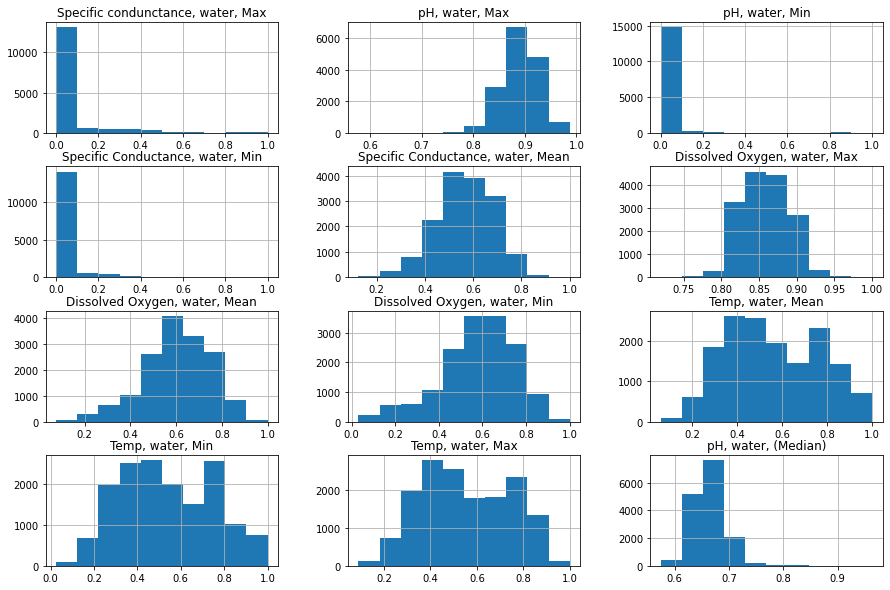

In [20]:
df_train.hist(bins=10, figsize=(15,10)) 
plt.show()

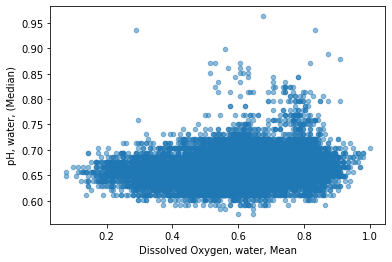

In [21]:
df_train.plot(kind='scatter', x='Dissolved Oxygen, water, Mean', y='pH, water, (Median)', alpha=0.5) 
plt.show()

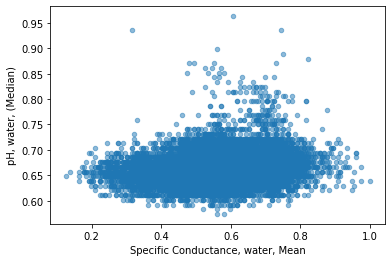

In [22]:
df_train.plot(kind='scatter', x='Specific Conductance, water, Mean', y='pH, water, (Median)', alpha=0.5) 
plt.show()

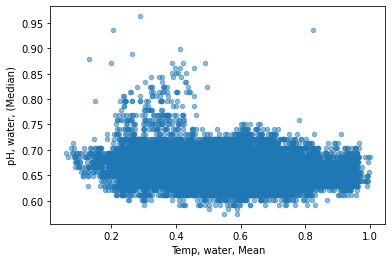

In [23]:
df_train.plot(kind='scatter', x='Temp, water, Mean', y='pH, water, (Median)', alpha=0.5) 
plt.show()

In [24]:
correlation_matrix = df_train.corr()
correlation_matrix

Specific condunctance, water, Max  \
Specific condunctance, water, Max                           1.000000   
pH, water, Max                                              0.158314   
pH, water, Min                                              0.843321   
Specific Conductance, water, Min                            0.955123   
Specific Conductance, water, Mean                          -0.419489   
Dissolved Oxygen, water, Max                                0.271223   
Dissolved Oxygen, water, Mean                              -0.481622   
Dissolved Oxygen, water, Min                               -0.530805   
Temp, water, Mean                                           0.248143   
Temp, water, Min                                            0.271449   
Temp, water, Max                                            0.222112   
pH, water, (Median)                                        -0.014412   

                                   pH, water, Max  pH, water, Min  \
Specific condunctance, water, Max        0.158314        0.843321   
pH, water, Max                           1.000000        0.206913   
pH, water, Min                           0.206913        1.000000   
Specific Conductance, water, Min         0.197343        0.959083   
Specific Conductance, water, Mean        0.215615       -0.249639   
Dissolved Oxygen, water, Max             0.888275        0.274214   
Dissolved Oxygen, water, Mean            0.170116       -0.287497   
Dissolved Oxygen, water, Min             0.153916       -0.319725   
Temp, water, Mean                       -0.110998        0.160894   
Temp, water, Min                        -0.119158        0.171208   
Temp, water, Max                        -0.101458        0.152971   
pH, water, (Median)                      0.043690       -0.009787   

                                   Specific Conductance, water, Min  \
Specific condunctance, water, Max                          0.955123   
pH, water, Max                                             0.197343   
pH, water, Min                                             0.959083   
Specific Conductance, water, Min                           1.000000   
Specific Conductance, water, Mean                         -0.341600   
Dissolved Oxygen, water, Max                               0.292342   
Dissolved Oxygen, water, Mean                             -0.393710   
Dissolved Oxygen, water, Min                              -0.431313   
Temp, water, Mean                                          0.209523   
Temp, water, Min                                           0.226150   
Temp, water, Max                                           0.192661   
pH, water, (Median)                                       -0.012954   

                                   Specific Conductance, water, Mean  \
Specific condunctance, water, Max                          -0.419489   
pH, water, Max                                              0.215615   
pH, water, Min                                             -0.249639   
Specific Conductance, water, Min                           -0.341600   
Specific Conductance, water, Mean                           1.000000   
Dissolved Oxygen, water, Max                                0.188059   
Dissolved Oxygen, water, Mean                               0.961475   
Dissolved Oxygen, water, Min                                0.894734   
Temp, water, Mean                                          -0.814717   
Temp, water, Min                                           -0.836057   
Temp, water, Max                                           -0.783213   
pH, water, (Median)                                         0.188911   

                                   Dissolved Oxygen, water, Max  \
Specific condunctance, water, Max                      0.271223   
pH, water, Max                                         0.888275   
pH, water, Min                                         0.274214   
Specific Conductance, water, Min                       0.292342   
Spec

<AxesSubplot:>

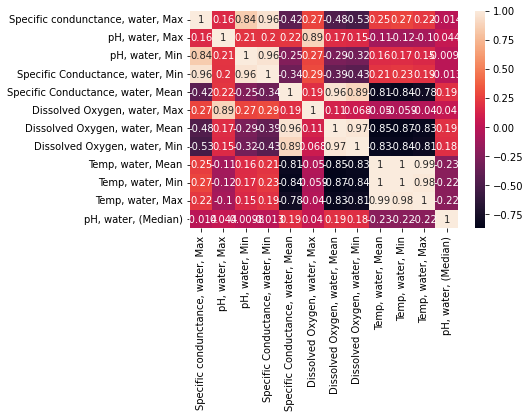

In [25]:
sns.heatmap(correlation_matrix, annot = True)

#### Analyse the testing data (EDA)

In [26]:
df_test.head()

Specific condunctance, water, Max  pH, water, Max  pH, water, Min  \
0                           0.002300        0.910256        0.001984   
1                           0.243665        0.923077        0.002534   
2                           0.208577        0.884615        0.007957   
3                           0.391813        0.935897        0.061100   
4                           0.497076        0.961538        0.243615   

   Specific Conductance, water, Min  Specific Conductance, water, Mean  \
0                          0.002051                           0.578947   
1                          0.110547                           0.572368   
2                          0.095508                           0.565789   
3                          0.228516                           0.519737   
4                          0.353516                           0.486842   

   Dissolved Oxygen, water, Max  Dissolved Oxygen, water, Mean  \
0                      0.865854                       0.651515   
1                      0.902439                       0.575758   
2                      0.890244                       0.583333   
3                      0.926829                       0.530303   
4                      0.926829                       0.530303   

   Dissolved Oxygen, water, Min  Temp, water, Mean  Temp, water, Min  \
0                      0.661417           0.571875          0.573718   
1                      0.503937           0.553125          0.541667   
2                      0.535433           0.556250          0.544872   
3                      0.519685           0.537500          0.528846   
4                      0.519685           0.531250          0.528846   

   Temp, water, Max  pH, water, (Median)  
0          0.543605             0.666667  
1          0.537791             0.666667  
2          0.552326             0.657407  
3          0.526163             0.657407  
4          0.514535             0.657407

In [27]:
df_test.tail()

Specific condunctance, water, Max  pH, water, Max  pH, water, Min  \
10429                           0.006238        0.935897        0.006130   
10430                           0.003138        0.858974        0.002967   
10431                           0.003840        0.948718        0.003399   
10432                           0.001287        0.910256        0.001277   
10433                           0.001209        0.897436        0.001198   

       Specific Conductance, water, Min  Specific Conductance, water, Mean  \
10429                          0.006172                           0.914474   
10430                          0.003047                           0.769737   
10431                          0.003672                           0.750000   
10432                          0.001289                           0.750000   
10433                          0.001211                           0.835526   

       Dissolved Oxygen, water, Max  Dissolved Oxygen, water, Mean  \
10429                      0.902439                       0.977273   
10430                      0.829268                       0.856061   
10431                      0.902439                       0.840909   
10432                      0.865854                       0.856061   
10433                      0.853659                       0.916667   

       Dissolved Oxygen, water, Min  Temp, water, Mean  Temp, water, Min  \
10429                      0.929134           0.068750          0.022436   
10430                      0.834646           0.093750          0.044872   
10431                      0.850394           0.215625          0.195513   
10432                      0.874016           0.225000          0.208333   
10433                      0.897638           0.128125          0.067308   

       Temp, water, Max  pH, water, (Median)  
10429          0.119186             0.648148  
10430          0.127907             0.657407  
10431          0.238372             0.657407  
10432          0.232558             0.648148  
10433          0.183140             0.657407

In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10434 entries, 0 to 10433
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Specific condunctance, water, Max  10434 non-null  float64
 1   pH, water, Max                     10434 non-null  float64
 2   pH, water, Min                     10434 non-null  float64
 3   Specific Conductance, water, Min   10434 non-null  float64
 4   Specific Conductance, water, Mean  10434 non-null  float64
 5   Dissolved Oxygen, water, Max       10434 non-null  float64
 6   Dissolved Oxygen, water, Mean      10434 non-null  float64
 7   Dissolved Oxygen, water, Min       10434 non-null  float64
 8   Temp, water, Mean                  10434 non-null  float64
 9   Temp, water, Min                   10434 non-null  float64
 10  Temp, water, Max                   10434 non-null  float64
 11  pH, water, (Median)                10434 non-null  flo

In [29]:
df_test.describe()

Specific condunctance, water, Max  pH, water, Max  pH, water, Min  \
count                       10434.000000    10434.000000    10434.000000   
mean                            0.081309        0.884268        0.034001   
std                             0.177998        0.036026        0.124276   
min                             0.000741        0.410256        0.000255   
25%                             0.001910        0.858974        0.001493   
50%                             0.002632        0.884615        0.002240   
75%                             0.005556        0.910256        0.004028   
max                             1.000000        1.000000        0.856582   

       Specific Conductance, water, Min  Specific Conductance, water, Mean  \
count                      10434.000000                       10434.000000   
mean                           0.052864                           0.525586   
std                            0.141488                           0.113802   
min                            0.000684                           0.118421   
25%                            0.001758                           0.467105   
50%                            0.002422                           0.526316   
75%                            0.005020                           0.592105   
max                            0.863281                           0.927632   

       Dissolved Oxygen, water, Max  Dissolved Oxygen, water, Mean  \
count                  10434.000000                   10434.000000   
mean                       0.855199                       0.555640   
std                        0.031214                       0.140529   
min                        0.731707                       0.068182   
25%                        0.841463                       0.500000   
50%                        0.853659                       0.568182   
75%                        0.878049                       0.628788   
max                        0.987805                       0.984848   

       Dissolved Oxygen, water, Min  Temp, water, Mean  Temp, water, Min  \
count                  10434.000000       10434.000000      10434.000000   
mean                       0.525946           0.635203          0.618800   
std                        0.169539           0.185173          0.192935   
min                        0.031496           0.062500          0.022436   
25%                        0.464567           0.528125          0.503205   
50%                        0.551181           0.675000          0.657051   
75%                        0.614173           0.765625          0.753205   
max                        0.960630           1.000000          0.993590   

       Temp, water, Max  pH, water, (Median)  
count      10434.000000         10434.000000  
mean           0.624415             0.662215  
std            0.172426             0.029440  
min            0.110465             0.574074  
25%            0.529070             0.648148  
50%            0.661337             0.657407  
75%            0.750000             0.675926  
max            0.991279             1.000000

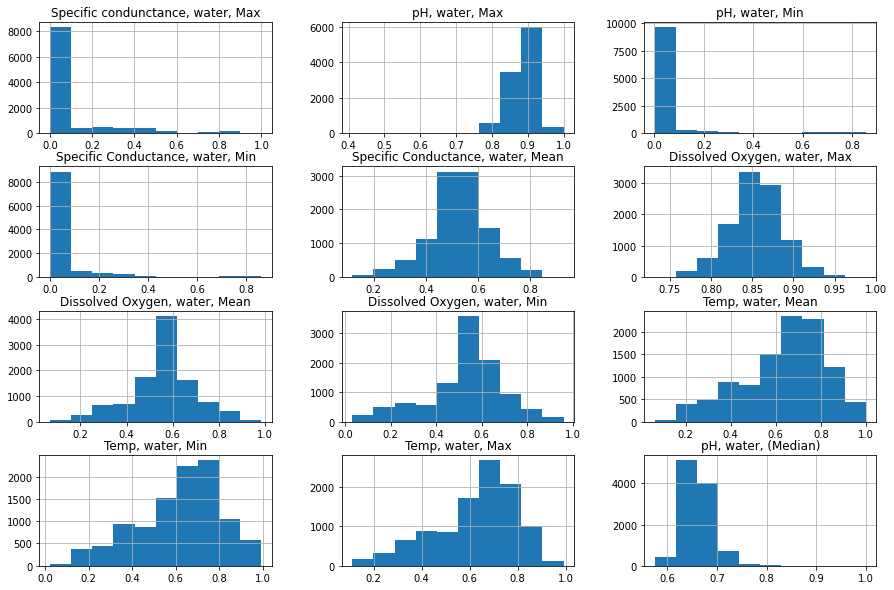

In [30]:
df_test.hist(bins=10, figsize=(15,10)) 
plt.show()

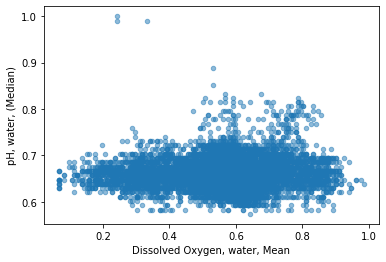

In [31]:
df_test.plot(kind='scatter', x='Dissolved Oxygen, water, Mean', y='pH, water, (Median)', alpha=0.5) 
plt.show()

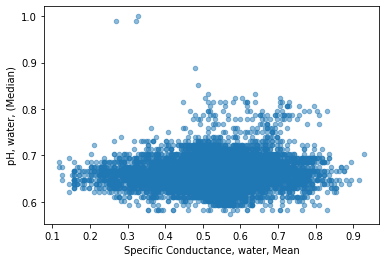

In [32]:
df_test.plot(kind='scatter', x='Specific Conductance, water, Mean', y='pH, water, (Median)', alpha=0.5) 
plt.show()

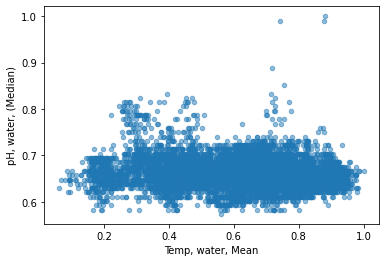

In [33]:
df_test.plot(kind='scatter', x='Temp, water, Mean', y='pH, water, (Median)', alpha=0.5) 
plt.show()

In [34]:
corr_matrix = df_test.corr()
corr_matrix

Specific condunctance, water, Max  \
Specific condunctance, water, Max                           1.000000   
pH, water, Max                                              0.235427   
pH, water, Min                                              0.830883   
Specific Conductance, water, Min                            0.953435   
Specific Conductance, water, Mean                          -0.498656   
Dissolved Oxygen, water, Max                                0.331686   
Dissolved Oxygen, water, Mean                              -0.572435   
Dissolved Oxygen, water, Min                               -0.608157   
Temp, water, Mean                                           0.240820   
Temp, water, Min                                            0.264902   
Temp, water, Max                                            0.212476   
pH, water, (Median)                                         0.010206   

                                   pH, water, Max  pH, water, Min  \
Specific condunctance, water, Max        0.235427        0.830883   
pH, water, Max                           1.000000        0.259954   
pH, water, Min                           0.259954        1.000000   
Specific Conductance, water, Min         0.267656        0.954769   
Specific Conductance, water, Mean        0.237808       -0.315849   
Dissolved Oxygen, water, Max             0.868079        0.321246   
Dissolved Oxygen, water, Mean            0.183799       -0.350567   
Dissolved Oxygen, water, Min             0.177717       -0.360486   
Temp, water, Mean                       -0.180558        0.142481   
Temp, water, Min                        -0.185123        0.153758   
Temp, water, Max                        -0.174521        0.133435   
pH, water, (Median)                      0.075673        0.013405   

                                   Specific Conductance, water, Min  \
Specific condunctance, water, Max                          0.953435   
pH, water, Max                                             0.267656   
pH, water, Min                                             0.954769   
Specific Conductance, water, Min                           1.000000   
Specific Conductance, water, Mean                         -0.418111   
Dissolved Oxygen, water, Max                               0.351866   
Dissolved Oxygen, water, Mean                             -0.475426   
Dissolved Oxygen, water, Min                              -0.494148   
Temp, water, Mean                                          0.194846   
Temp, water, Min                                           0.212938   
Temp, water, Max                                           0.175728   
pH, water, (Median)                                        0.012411   

                                   Specific Conductance, water, Mean  \
Specific condunctance, water, Max                          -0.498656   
pH, water, Max                                              0.237808   
pH, water, Min                                             -0.315849   
Specific Conductance, water, Min                           -0.418111   
Specific Conductance, water, Mean                           1.000000   
Dissolved Oxygen, water, Max                                0.222914   
Dissolved Oxygen, water, Mean                               0.953632   
Dissolved Oxygen, water, Min                                0.870276   
Temp, water, Mean                                          -0.800140   
Temp, water, Min                                           -0.817865   
Temp, water, Max                                           -0.770218   
pH, water, (Median)                                         0.088457   

                                   Dissolved Oxygen, water, Max  \
Specific condunctance, water, Max                      0.331686   
pH, water, Max                                         0.868079   
pH, water, Min                                         0.321246   
Specific Conductance, water, Min                       0.351866   
Spec

<AxesSubplot:>

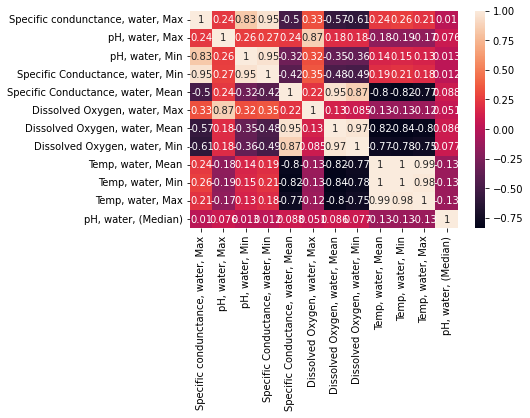

In [35]:
import seaborn as sns
sns.heatmap(corr_matrix, annot = True)

#### 3D plot - Inputs and Outputs

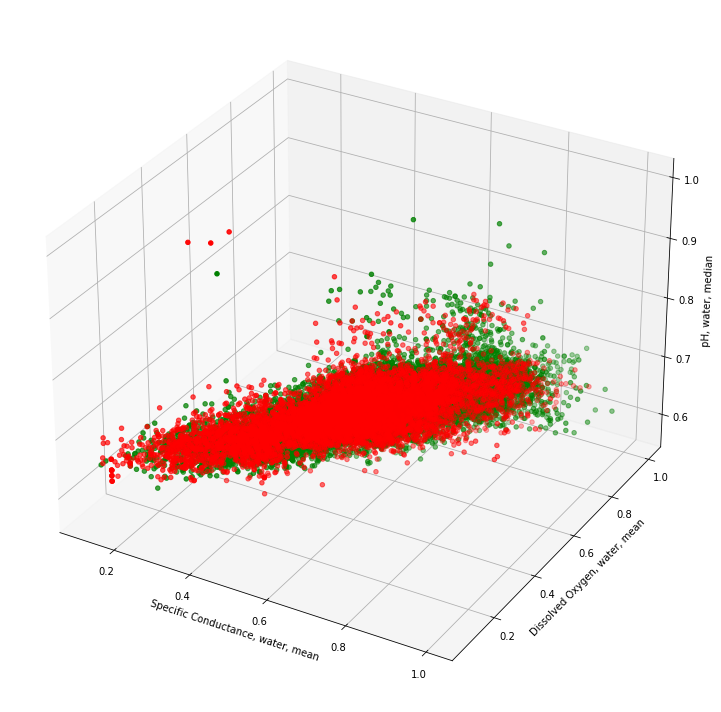

In [36]:
#Plotting using manual selection of features to visualize the data

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(projection = '3d')

ax.scatter(df_train.iloc[:, 4], df_train.iloc[:, 6], df_train.iloc[:, 11], color = "g")
ax.scatter(df_test.iloc[:, 4], df_test.iloc[:, 6], df_test.iloc[:, 11], color = "r")

ax.set_xlabel("Specific Conductance, water, mean")
ax.set_ylabel("Dissolved Oxygen, water, mean")
ax.set_zlabel("pH, water, median")

plt.tight_layout()
plt.show()

### Preparing the data for machine learning model

In [37]:
X_tr = df_X_tr
X_tr.head()


Specific condunctance, water, Max  pH, water, Max  pH, water, Min  \
0                           0.001131        0.884615        0.001120   
1                           0.001170        0.871795        0.001159   
2                           0.001326        0.884615        0.001198   
3                           0.014094        0.858974        0.001238   
4                           0.088109        0.858974        0.010766   

   Specific Conductance, water, Min  Specific Conductance, water, Mean  \
0                          0.001113                           0.677632   
1                          0.001152                           0.703947   
2                          0.001250                           0.677632   
3                          0.003926                           0.697368   
4                          0.029297                           0.684211   

   Dissolved Oxygen, water, Max  Dissolved Oxygen, water, Mean  \
0                      0.841463                       0.765152   
1                      0.829268                       0.772727   
2                      0.853659                       0.750000   
3                      0.829268                       0.772727   
4                      0.853659                       0.765152   

   Dissolved Oxygen, water, Min  Temp, water, Mean  Temp, water, Min  \
0                      0.787402           0.293750          0.298077   
1                      0.795276           0.293750          0.301282   
2                      0.755906           0.300000          0.298077   
3                      0.771654           0.296875          0.294872   
4                      0.755906           0.296875          0.291667   

   Temp, water, Max  
0          0.276163  
1          0.276163  
2          0.287791  
3          0.279070  
4          0.281977

In [38]:
X_te = df_X_te
X_te.head()

Specific condunctance, water, Max  pH, water, Max  pH, water, Min  \
0                           0.002300        0.910256        0.001984   
1                           0.243665        0.923077        0.002534   
2                           0.208577        0.884615        0.007957   
3                           0.391813        0.935897        0.061100   
4                           0.497076        0.961538        0.243615   

   Specific Conductance, water, Min  Specific Conductance, water, Mean  \
0                          0.002051                           0.578947   
1                          0.110547                           0.572368   
2                          0.095508                           0.565789   
3                          0.228516                           0.519737   
4                          0.353516                           0.486842   

   Dissolved Oxygen, water, Max  Dissolved Oxygen, water, Mean  \
0                      0.865854                       0.651515   
1                      0.902439                       0.575758   
2                      0.890244                       0.583333   
3                      0.926829                       0.530303   
4                      0.926829                       0.530303   

   Dissolved Oxygen, water, Min  Temp, water, Mean  Temp, water, Min  \
0                      0.661417           0.571875          0.573718   
1                      0.503937           0.553125          0.541667   
2                      0.535433           0.556250          0.544872   
3                      0.519685           0.537500          0.528846   
4                      0.519685           0.531250          0.528846   

   Temp, water, Max  
0          0.543605  
1          0.537791  
2          0.552326  
3          0.526163  
4          0.514535

In [39]:
y_tr = df_Y_tr
y_tr.head()

pH, water, (Median)
0             0.648148
1             0.648148
2             0.648148
3             0.648148
4             0.648148

In [40]:
y_te = df_Y_te
y_te.head()

pH, water, (Median)
0             0.666667
1             0.666667
2             0.657407
3             0.657407
4             0.657407

In [41]:
X_tr = (X_tr.values).astype(np.float32)
y_tr = (y_tr.values).astype(np.float32)

X_te = (X_te.values).astype(np.float32)
y_te = (y_te.values).astype(np.float32)

In [42]:
print(X_tr.shape)
print(y_tr.shape)

(15651, 11)
(15651, 1)


In [43]:
print(type(X_tr))
print(type(y_tr))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Standardization (mean=0, std=1)

$TV'\ =\ (TV-µ)/σ$

In [44]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() 

sc.fit(X_tr) 

X_tr_std = sc.transform(X_tr) 
X_te_std = sc.transform(X_te)

#### PCA and TSNE for feature reduction and Visualization

In [45]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)

X_2D_pca_tr = pca2.fit_transform(X_tr_std)
X_2D_pca_te = pca2.fit_transform(X_te_std)

print(X_2D_pca_tr.shape)
print(X_2D_pca_te.shape)


(15651, 2)
(10434, 2)


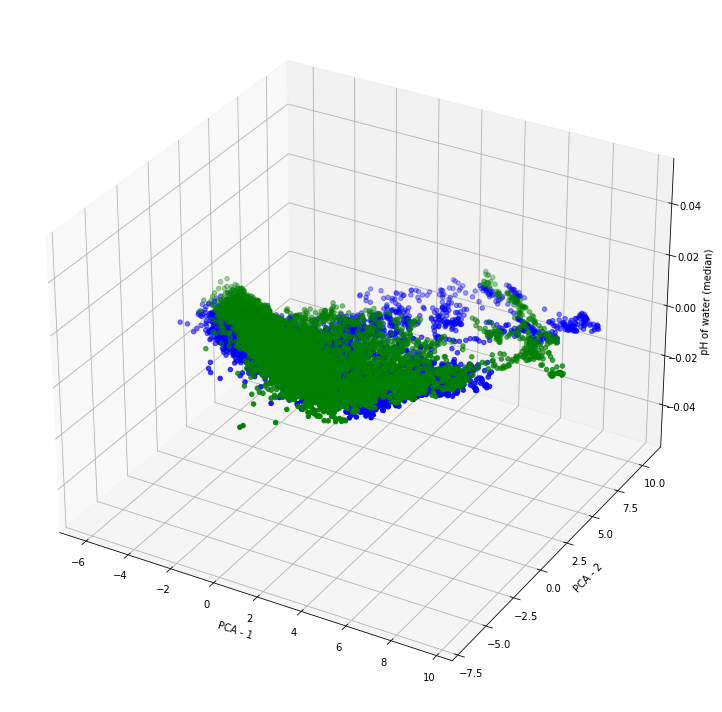

In [46]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(projection = '3d')

ax.scatter(X_2D_pca_tr[:, 0], X_2D_pca_tr[:, 1], color = "b")
ax.scatter(X_2D_pca_te[:, 0], X_2D_pca_te[:, 1], color = "g")


ax.set_xlabel("PCA - 1")
ax.set_ylabel("PCA - 2")
ax.set_zlabel("pH of water (median)")

plt.tight_layout()
plt.show()

In [47]:
from sklearn.manifold import TSNE

tsne2 = TSNE(n_components=2, init = 'pca', learning_rate = 'auto')

X_train_2D_tsne = tsne2.fit_transform(X_tr_std)
X_test_2D_tsne = tsne2.fit_transform(X_te_std)

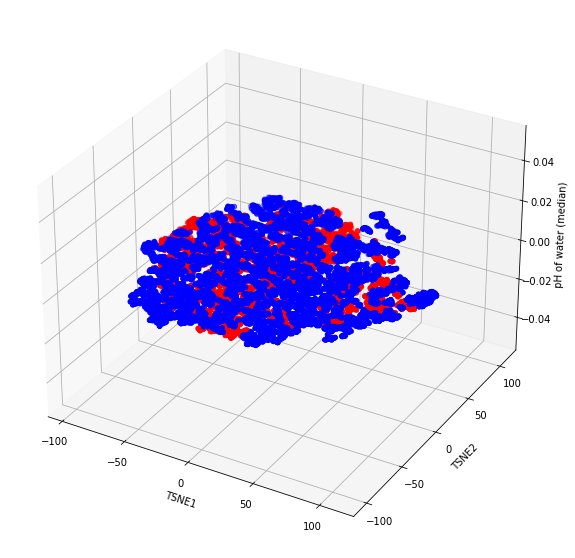

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train_2D_tsne[:, 0], X_train_2D_tsne[:, 1], c='b')
ax.scatter(X_test_2D_tsne[:, 0], X_test_2D_tsne[:, 1], c='r')

ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('pH of water (median)')

plt.show()

### Feature Selection Methods
#### Select K Best

In [49]:
from sklearn.feature_selection import SelectKBest, f_classif

kbest_selector = SelectKBest(f_classif, k=6)
X_train_kbest = kbest_selector.fit_transform(X_tr_std, y_tr)
X_test_kbest = kbest_selector.fit_transform(X_te_std, y_te)
print(X_train_kbest.shape)
print(X_test_kbest.shape)

kbest_selector.get_feature_names_out()

(15651, 6)
(10434, 6)


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['x4', 'x6', 'x7', 'x8', 'x9', 'x10'], dtype=object)

### Linear Regression model

#### Linear Regression Baseline Model

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

model_lin = LinearRegression()
y_pred_lin = model_lin.fit(X_tr, y_tr).predict(X_te)

print(model_lin.intercept_) 
print(model_lin.coef_)

#Root mean squared error
RMSE_lin = mean_squared_error(y_te, y_pred_lin, squared = False)
print("The Root mean squared error value of Linear Regression is: ", RMSE_lin)

#Normalized Root Mean Squared Error
NRMSE_lin = RMSE_lin/np.mean(y_te)
print("The Normalized Root mean squared error value of Linear Regression is: ", NRMSE_lin)

#Mean absolute error
MAE_lin = mean_absolute_error(y_te, y_pred_lin)
print("The Mean absolute error value of Linear Regression is : ", MAE_lin)

#Normalized Mean Absolute error
NMAE_lin = MAE_lin/np.mean(y_te)
print("The Normalized Mean absolute error value of Linear Regression is : ", NMAE_lin)

print("\n")

#Cross Validation scores of linear regression model
scores_lin = cross_val_score(model_lin, X_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of Linear regression is : ", scores_lin.mean(), '+/-', scores_lin.std())

[0.65807223]
[[ 0.0251066  -0.00340568 -0.00423427 -0.01421741 -0.02947379  0.01320586
   0.07316059 -0.03012393  0.09506851 -0.07027359 -0.05106024]]
The Root mean squared error value of Linear Regression is:  0.029304186
The Normalized Root mean squared error value of Linear Regression is:  0.0442518
The Mean absolute error value of Linear Regression is :  0.02115069
The Normalized Mean absolute error value of Linear Regression is :  0.031939328


Cross - validation score of Linear regression is :  -0.022038722317665814 +/- 0.005516003854485295


#### Linear Regression Standardized model

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

model_lin = LinearRegression()
y_pred_lin = model_lin.fit(X_tr_std, y_tr).predict(X_te_std)

print(model_lin.intercept_) 
print(model_lin.coef_)

#Root mean squared error
RMSE_lin = mean_squared_error(y_te, y_pred_lin, squared = False)
print("The Root mean squared error value of Linear Regression is: ", RMSE_lin)

#Normalized Root mean Squared Error
NRMSE_lin = RMSE_lin/np.mean(y_te)
print("The Normalized Root mean squared error value of Linear Regression is: ", NRMSE_lin)

#Mean absolute error
MAE_lin = mean_absolute_error(y_te, y_pred_lin)
print("The Mean absolute error value of Linear Regression is : ", MAE_lin)

#Normalized Mean Absolute error
NMAE_lin = MAE_lin/np.mean(y_te)
print("The Normalized Mean absolute error value of Linear Regression is : ", NMAE_lin)

print("\n")

#Cross Validation scores of linear regression model
scores_lin = cross_val_score(model_lin, X_tr_std, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of Linear regression is : ", scores_lin.mean(), '+/-', scores_lin.std())

[0.6643706]
[[ 0.00405163 -0.00011852 -0.00051159 -0.00189446 -0.00355246  0.00041019
   0.01073758 -0.00517642  0.01939792 -0.01491802 -0.00970756]]
The Root mean squared error value of Linear Regression is:  0.029304182
The Normalized Root mean squared error value of Linear Regression is:  0.044251792
The Mean absolute error value of Linear Regression is :  0.021150697
The Normalized Mean absolute error value of Linear Regression is :  0.03193934


Cross - validation score of Linear regression is :  -0.022038700617849828 +/- 0.005516045250955238


#### Linear Regression Standardized model with Dimensionality Reduction (PCA)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

model_lin = LinearRegression()
y_pred_lin = model_lin.fit(X_2D_pca_tr, y_tr).predict(X_2D_pca_te)

print(model_lin.intercept_) 
print(model_lin.coef_)

#Root mean squared error
RMSE_lin = mean_squared_error(y_te, y_pred_lin, squared = False)
print("The Root mean squared error value of Linear Regression is: ", RMSE_lin)

#Normalized Root mean Squared Error
NRMSE_lin = RMSE_lin/np.mean(y_te)
print("The Normalized Root mean squared error value of Linear Regression is: ", NRMSE_lin)

#Mean absolute error
MAE_lin = mean_absolute_error(y_te, y_pred_lin)
print("The Mean absolute error value of Linear Regression is : ", MAE_lin)

#Normalized Mean Absolute error
NMAE_lin = MAE_lin/np.mean(y_te)
print("The Normalized Mean absolute error value of Linear Regression is : ", NMAE_lin)

print("\n")

#Cross Validation scores of linear regression model
scores_lin = cross_val_score(model_lin, X_2D_pca_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of Linear regression is : ", scores_lin.mean(), '+/-', scores_lin.std())

[0.66437066]
[[-0.00235336  0.00169084]]
The Root mean squared error value of Linear Regression is:  0.029448569
The Normalized Root mean squared error value of Linear Regression is:  0.04446983
The Mean absolute error value of Linear Regression is :  0.021446986
The Normalized Mean absolute error value of Linear Regression is :  0.03238676


Cross - validation score of Linear regression is :  -0.021761310379952194 +/- 0.005433452698628353


#### Linear Regression Standardized model with KBest Feature reduction

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

model_lin = LinearRegression()
y_pred_lin = model_lin.fit(X_train_kbest, y_tr).predict(X_test_kbest)

print(model_lin.intercept_)
print(model_lin.coef_)

#Root mean squared error
RMSE_lin = mean_squared_error(y_te, y_pred_lin, squared = False)
print("The Root mean squared error value of Linear Regression is: ", RMSE_lin)

#Normalized Root mean Squared Error
NRMSE_lin = RMSE_lin/np.mean(y_te)
print("The Normalized Root mean squared error value of Linear Regression is: ", NRMSE_lin)

#Mean absolute error
MAE_lin = mean_absolute_error(y_te, y_pred_lin)
print("The Mean absolute error value of Linear Regression is : ", MAE_lin)

#Normalized Mean Absolute error
NMAE_lin = MAE_lin/np.mean(y_te)
print("The Normalized Mean absolute error value of Linear Regression is : ", NMAE_lin)

print("\n")

#Cross Validation scores of linear regression model
scores_lin = cross_val_score(model_lin, X_train_kbest, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of Linear regression is : ", scores_lin.mean(), '+/-', scores_lin.std())

[0.66437066]
[[-0.00268176  0.01060723 -0.0077441   0.01581896 -0.01081537 -0.01123085]]
The Root mean squared error value of Linear Regression is:  0.029332636
The Normalized Root mean squared error value of Linear Regression is:  0.04429476
The Mean absolute error value of Linear Regression is :  0.021131147
The Normalized Mean absolute error value of Linear Regression is :  0.03190982


Cross - validation score of Linear regression is :  -0.02196110337972641 +/- 0.0055295791899476615


### Polynomial Regression

#### Polynomial Regression Baseline Model

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

poly_features = PolynomialFeatures(degree = 2, include_bias=False)

X_tr_poly = poly_features.fit_transform(X_tr)
X_te_poly = poly_features.fit_transform(X_te)

poly_reg=LinearRegression() 
poly_reg.fit(X_tr_poly,y_tr)

y_pred_poly = poly_reg.predict(X_te_poly)

print(poly_reg.intercept_)
print(poly_reg.coef_)

RMSE_poly = mean_squared_error(y_te, y_pred_poly, squared = False)
print("The Root mean squared error value of Polynomial Regression is: ", RMSE_poly)

NRMSE_poly = RMSE_poly/np.mean(y_te)
print("The Normalized Root mean squared error value of Polynomial Regression is: ", NRMSE_poly)

MAE_poly = mean_absolute_error(y_te, y_pred_poly)
print("The Mean absolute error value of Polynomial Regression is : ", MAE_poly)

NMAE_poly = MAE_poly/np.mean(y_te)
print("The Normalized Mean absolute error value of Polynomial Regression is : ", NMAE_poly)

print("\n")

CV_poly = cross_val_score(poly_reg, X_tr_poly, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of Polynomial regression is : ", CV_poly.mean(), '+/-', CV_poly.std())

[0.74120426]
[[  0.43201485  -1.3179619   -0.3055245   -0.45258644  -0.45649856
    1.7073146    0.04695828  -0.05207027   2.4486208   -1.2566655
   -1.5624521   -0.3582036    0.28762895   0.35137758   0.48330456
    1.2668558   -0.65887123  -1.0762573   -0.02464737   6.5633597
   -3.5379465   -3.30554      0.36494088  -0.14835715   0.22061789
   -0.7628014   -0.88084644   2.411124    -0.2299137    3.573516
   -2.144681    -0.60775286   0.48721486  -0.9766218    0.5278455
    0.3271246    0.25576982  -0.57391334   7.908324    -4.889018
   -3.1288424   -0.04758143  -1.6764747    0.4707154    0.52603084
    0.6329546  -14.122316     8.014584     6.485411     0.4093287
    0.5051812    0.08509803  -0.19424415   1.5573599   -0.0459103
   -1.1563466    0.11096691  -1.5989833    0.03691059  -6.3520393
    3.3796425    2.3172154   -0.71414876   0.663921    -0.8151023
   -0.15317047   0.55514     -0.19106245  -1.0006071    0.58635306
    0.6191659    7.6253357   -8.615107    -6.796803     2.74

Cross - validation score of Polynomial regression is :  -0.022815931029617785 +/- 0.005464401395922832


#### Polynomial Regression Standardized model

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

poly_features = PolynomialFeatures(degree = 2, include_bias=False)

X_tr_poly = poly_features.fit_transform(X_tr_std)
X_te_poly = poly_features.fit_transform(X_te_std)

poly_reg=LinearRegression() 
poly_reg.fit(X_tr_poly,y_tr)

y_pred_poly = poly_reg.predict(X_te_poly)

print(poly_reg.intercept_)
print(poly_reg.coef_)

RMSE_poly = mean_squared_error(y_te, y_pred_poly, squared = False)
print("The Root mean squared error value of Polynomial Regression is: ", RMSE_poly)

NRMSE_poly = RMSE_poly/np.mean(y_te)
print("The Normalized Root mean squared error value of Polynomial Regression is: ", NRMSE_poly)

MAE_poly = mean_absolute_error(y_te, y_pred_poly)
print("The Mean absolute error value of Polynomial Regression is : ", MAE_poly)

NMAE_poly = MAE_poly/np.mean(y_te)
print("The Normalized Mean absolute error value of Polynomial Regression is : ", NMAE_poly)

print("\n")

CV_poly = cross_val_score(poly_reg, X_tr_poly, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of Polynomial regression is : ", CV_poly.mean(), '+/-', CV_poly.std())

[0.6639281]
[[ 1.45575833e-02 -1.73767679e-04  3.04626720e-03 -1.33462958e-02
  -8.23506061e-03 -1.54535519e-05  1.71952527e-02 -7.79551640e-03
   2.94397902e-02 -2.27896962e-02 -1.31418090e-02 -9.29623563e-03
   1.52989361e-03  6.80511631e-03  1.05105052e-02  2.46969983e-02
  -3.46521288e-03 -2.53097899e-02 -6.29683957e-04  2.16365993e-01
  -1.21628150e-01 -1.01254426e-01  4.50387830e-04 -8.01088871e-04
   1.29840558e-03 -3.28419963e-03 -9.60774021e-04  1.24307238e-02
  -1.37275038e-03  2.52342075e-02 -1.58268567e-02 -3.86191718e-03
   6.83891866e-03 -1.50031168e-02  8.04178044e-03  1.03609264e-03
   4.60620597e-03 -1.19194016e-02  1.94908693e-01 -1.25347435e-01
  -7.18653202e-02 -1.36146694e-03 -2.72601023e-02  2.29725242e-03
   9.87058505e-03  1.45344231e-02 -3.84269148e-01  2.26801172e-01
   1.64485946e-01  5.97800827e-03  1.93998218e-03  1.41639635e-03
  -4.07744572e-03  3.74904573e-02 -9.22974199e-04 -2.60501169e-02
   9.60826874e-05 -7.40403403e-03  2.22560018e-04 -4.00659591e-0

#### Polynomial Regression Standardized model with Dimensionality Reduction (PCA)

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

poly_features = PolynomialFeatures(degree = 2, include_bias=False)

X_tr_poly = poly_features.fit_transform(X_2D_pca_tr)
X_te_poly = poly_features.fit_transform(X_2D_pca_te)

poly_reg=LinearRegression() 
poly_reg.fit(X_tr_poly,y_tr)

y_pred_poly = poly_reg.predict(X_te_poly)

print(poly_reg.intercept_)
print(poly_reg.coef_)

RMSE_poly = mean_squared_error(y_te, y_pred_poly, squared = False)
print("The Root mean squared error value of Polynomial Regression is: ", RMSE_poly)

NRMSE_poly = RMSE_poly/np.mean(y_te)
print("The Normalized Root mean squared error value of Polynomial Regression is: ", NRMSE_poly)

MAE_poly = mean_absolute_error(y_te, y_pred_poly)
print("The Mean absolute error value of Polynomial Regression is : ", MAE_poly)

NMAE_poly = MAE_poly/np.mean(y_te)
print("The Normalized Mean absolute error value of Polynomial Regression is : ", NMAE_poly)

print("\n")

scores_poly = cross_val_score(poly_reg, X_tr_poly, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of Polynomial regression is : ", scores_poly.mean(), '+/-', scores_poly.std())

[0.6637528]
[[-2.4147381e-03  1.6461208e-03  7.6329816e-05 -1.1300727e-04
   5.7311980e-05]]
The Root mean squared error value of Polynomial Regression is:  0.02948573
The Normalized Root mean squared error value of Polynomial Regression is:  0.044525947
The Mean absolute error value of Polynomial Regression is :  0.021471387
The Normalized Mean absolute error value of Polynomial Regression is :  0.032423608


Cross - validation score of Polynomial regression is :  -0.021925284061580896 +/- 0.005468691331664141


#### Polynomial Regression Standardized model with KBest Feature Selection

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

poly_features = PolynomialFeatures(degree = 2, include_bias=False)

X_tr_poly = poly_features.fit_transform(X_train_kbest)
X_te_poly = poly_features.fit_transform(X_test_kbest)

poly_reg=LinearRegression() 
poly_reg.fit(X_tr_poly,y_tr)

y_pred_poly = poly_reg.predict(X_te_poly)

print(poly_reg.intercept_)
print(poly_reg.coef_)

RMSE_poly = mean_squared_error(y_te, y_pred_poly, squared = False)
print("The Root mean squared error value of Polynomial Regression is: ", RMSE_poly)

NRMSE_poly = RMSE_poly/np.mean(y_te)
print("The Normalized Root mean squared error value of Polynomial Regression is: ", NRMSE_poly)

MAE_poly = mean_absolute_error(y_te, y_pred_poly)
print("The Mean absolute error value of Polynomial Regression is : ", MAE_poly)

NMAE_poly = MAE_poly/np.mean(y_te)
print("The Normalized Mean absolute error value of Polynomial Regression is : ", NMAE_poly)

print("\n")

scores_poly = cross_val_score(poly_reg, X_tr_poly, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of Polynomial regression is : ", scores_poly.mean(), '+/-', scores_poly.std())

[0.6621481]
[[-0.00843984  0.01969264 -0.01158303  0.01820697 -0.01021948 -0.0148002
   0.00644799 -0.0050215  -0.00314149 -0.00362761  0.03184743 -0.02013242
  -0.01064005  0.01772681 -0.00965584 -0.04779582  0.043373   -0.00534352
  -0.0160889   0.02208706  0.00298224  0.32093212 -0.38496226 -0.27234817
   0.1294768   0.1290581   0.08101372]]
The Root mean squared error value of Polynomial Regression is:  0.030315433
The Normalized Root mean squared error value of Polynomial Regression is:  0.045778867
The Mean absolute error value of Polynomial Regression is :  0.021334486
The Normalized Mean absolute error value of Polynomial Regression is :  0.032216877


Cross - validation score of Polynomial regression is :  -0.02240838287398219 +/- 0.005485650682391552


### Lasso Regression Model

#### Lasso Regression Baseline Model

In [58]:

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

lasso_reg = Lasso(alpha = 0.1)
y_pred_lasso = lasso_reg.fit(X_tr, y_tr).predict(X_te)

print(lasso_reg.intercept_)
print(lasso_reg.coef_)

RMSE_lasso = mean_squared_error(y_te, y_pred_lasso, squared = False)
print("The Root mean squared error value of Lasso Regression is: ", RMSE_lasso)

NRMSE_lasso = RMSE_lasso/np.mean(y_te)
print("The Normalized Root mean squared error value of Lasso Regression is: ", NRMSE_lasso)

MAE_lasso = mean_absolute_error(y_te, y_pred_lasso)
print("The Mean absolute error value of Lasso Regression is : ", MAE_lasso)

NMAE_lasso = MAE_lasso/np.mean(y_te)
print("The Normalized Mean absolute error value of Lasso Regression is : ", NMAE_lasso)

print("\n")

CV_lasso = cross_val_score(lasso_reg, X_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of Lasso regression is : ", CV_lasso.mean(), '+/-', CV_lasso.std())


[0.66437066]
[-0.  0. -0. -0.  0.  0.  0.  0. -0. -0. -0.]
The Root mean squared error value of Lasso Regression is:  0.029517703
The Normalized Root mean squared error value of Lasso Regression is:  0.044574227
The Mean absolute error value of Lasso Regression is :  0.021422405
The Normalized Mean absolute error value of Lasso Regression is :  0.032349642


Cross - validation score of Lasso regression is :  -0.022078065294772388 +/- 0.005959210387631509


#### Lasso Regression Standardized model

In [59]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

lasso_reg = Lasso(alpha = 0.1)
y_pred_lasso = lasso_reg.fit(X_tr_std, y_tr).predict(X_te_std)

print(lasso_reg.intercept_)
print(lasso_reg.coef_)

RMSE_lasso = mean_squared_error(y_te, y_pred_lasso, squared = False)
print("The Root mean squared error value of Lasso Regression is: ", RMSE_lasso)

NRMSE_lasso = RMSE_lasso/np.mean(y_te)
print("The Normalized Root mean squared error value of Lasso Regression is: ", NRMSE_lasso)

MAE_lasso = mean_absolute_error(y_te, y_pred_lasso)
print("The Mean absolute error value of Lasso Regression is : ", MAE_lasso)

NMAE_lasso = MAE_lasso/np.mean(y_te)
print("The Normalized Mean absolute error value of Lasso Regression is : ", NMAE_lasso)

print("\n")

CV_lasso = cross_val_score(lasso_reg, X_tr_std, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of Lasso regression is : ", CV_lasso.mean(), '+/-', CV_lasso.std())

[0.66437066]
[-0.  0. -0. -0.  0.  0.  0.  0. -0. -0. -0.]
The Root mean squared error value of Lasso Regression is:  0.029517703
The Normalized Root mean squared error value of Lasso Regression is:  0.044574227
The Mean absolute error value of Lasso Regression is :  0.021422405
The Normalized Mean absolute error value of Lasso Regression is :  0.032349642


Cross - validation score of Lasso regression is :  -0.022078065294772388 +/- 0.005959210387631509


#### Lasso Regression Standardized model with Dimensionality Reduction (PCA)

In [60]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

lasso_reg = Lasso(alpha = 0.1)
y_pred_lasso = lasso_reg.fit(X_2D_pca_tr, y_tr).predict(X_2D_pca_te)

print(lasso_reg.intercept_)
print(lasso_reg.coef_)

RMSE_lasso = mean_squared_error(y_te, y_pred_lasso, squared = False)
print("The Root mean squared error value of Lasso Regression is: ", RMSE_lasso)

NRMSE_lasso = RMSE_lasso/np.mean(y_te)
print("The Normalized Root mean squared error value of Lasso Regression is: ", NRMSE_lasso)

MAE_lasso = mean_absolute_error(y_te, y_pred_lasso)
print("The Mean absolute error value of Lasso Regression is : ", MAE_lasso)

NMAE_lasso = MAE_lasso/np.mean(y_te)
print("The Normalized Mean absolute error value of Lasso Regression is : ", NMAE_lasso)

print("\n")

CV_lasso = cross_val_score(lasso_reg, X_2D_pca_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of Lasso regression is : ", CV_lasso.mean(), '+/-', CV_lasso.std())

[0.66437066]
[-0.  0.]
The Root mean squared error value of Lasso Regression is:  0.029517703
The Normalized Root mean squared error value of Lasso Regression is:  0.044574227
The Mean absolute error value of Lasso Regression is :  0.021422405
The Normalized Mean absolute error value of Lasso Regression is :  0.032349642


Cross - validation score of Lasso regression is :  -0.022078065294772388 +/- 0.005959210387631509


#### Lasso Regression Standardized model with KBest Feature reduction

In [61]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

lasso_reg = Lasso(alpha = 0.1)
y_pred_lasso = lasso_reg.fit(X_train_kbest, y_tr).predict(X_test_kbest)

print(lasso_reg.intercept_)
print(lasso_reg.coef_)

RMSE_lasso = mean_squared_error(y_te, y_pred_lasso, squared = False)
print("The Root mean squared error value of Lasso Regression is: ", RMSE_lasso)

NRMSE_lasso = RMSE_lasso/np.mean(y_te)
print("The Normalized Root mean squared error value of Lasso Regression is: ", NRMSE_lasso)

MAE_lasso = mean_absolute_error(y_te, y_pred_lasso)
print("The Mean absolute error value of Lasso Regression is : ", MAE_lasso)

NMAE_lasso = MAE_lasso/np.mean(y_te)
print("The Normalized Mean absolute error value of Lasso Regression is : ", NMAE_lasso)

print("\n")

CV_lasso = cross_val_score(lasso_reg, X_train_kbest, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of Lasso regression is : ", CV_lasso.mean(), '+/-', CV_lasso.std())

[0.66437066]
[ 0.  0.  0. -0. -0. -0.]
The Root mean squared error value of Lasso Regression is:  0.029517703
The Normalized Root mean squared error value of Lasso Regression is:  0.044574227
The Mean absolute error value of Lasso Regression is :  0.021422405
The Normalized Mean absolute error value of Lasso Regression is :  0.032349642


Cross - validation score of Lasso regression is :  -0.022078065294772388 +/- 0.005959210387631509


### Ridge Regression Model

#### Ridge Regression Baseline Model

In [62]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

ridge_reg = Ridge(alpha = 0.1, solver = 'cholesky')
y_pred_rid = ridge_reg.fit(X_tr, y_tr).predict(X_te)

print(ridge_reg.intercept_)
print(ridge_reg.coef_)

RMSE_ridge = mean_squared_error(y_te, y_pred_rid, squared = False)
print("The Root mean squared error value of Ridge Regression is: ", RMSE_ridge)

NRMSE_ridge = RMSE_ridge/np.mean(y_te)
print("The Normalized Root mean squared error value of Ridge Regression is: ", NRMSE_ridge)

MAE_ridge = mean_absolute_error(y_te, y_pred_rid)
print("The Mean absolute error value of Ridge Regression is : ", MAE_ridge)

NMAE_ridge = MAE_ridge/np.mean(y_te)
print("The Normalized Mean absolute error value of Ridge Regression is : ", NMAE_ridge)

print("\n")

CV_ridge = cross_val_score(ridge_reg, X_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of Ridge regression is : ", CV_ridge.mean(), '+/-', CV_ridge.std())


[0.6585157]
[[ 0.02477248 -0.00278459 -0.00473804 -0.01349407 -0.02718201  0.01232726
   0.06946756 -0.02861432  0.0668377  -0.05519208 -0.03758541]]
The Root mean squared error value of Ridge Regression is:  0.029297192
The Normalized Root mean squared error value of Ridge Regression is:  0.044241235
The Mean absolute error value of Ridge Regression is :  0.021145761
The Normalized Mean absolute error value of Ridge Regression is :  0.03193189


Cross - validation score of Ridge regression is :  -0.02203599186614156 +/- 0.005517326518324665


#### Ridge Regression Standardized model

In [63]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

ridge_reg = Ridge(alpha = 0.1, solver = 'cholesky')
y_pred_rid = ridge_reg.fit(X_tr_std, y_tr).predict(X_te_std)

print(ridge_reg.intercept_)
print(ridge_reg.coef_)

RMSE_ridge = mean_squared_error(y_te, y_pred_rid, squared = False)
print("The Root mean squared error value of Ridge Regression is: ", RMSE_ridge)

NRMSE_ridge = RMSE_ridge/np.mean(y_te)
print("The Normalized Root mean squared error value of Ridge Regression is: ", NRMSE_ridge)

MAE_ridge = mean_absolute_error(y_te, y_pred_rid)
print("The Mean absolute error value of Ridge Regression is : ", MAE_ridge)

NMAE_ridge = MAE_ridge/np.mean(y_te)
print("The Normalized Mean absolute error value of Ridge Regression is : ", NMAE_ridge)

print("\n")

CV_ridge = cross_val_score(ridge_reg, X_tr_std, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of Ridge regression is : ", CV_ridge.mean(), '+/-', CV_ridge.std())

[0.6643706]
[[ 0.00404849 -0.00011781 -0.00051529 -0.00188883 -0.0035447   0.00040952
   0.01072318 -0.00517032  0.01909049 -0.01474827 -0.00956936]]
The Root mean squared error value of Ridge Regression is:  0.02930386
The Normalized Root mean squared error value of Ridge Regression is:  0.044251308
The Mean absolute error value of Ridge Regression is :  0.021150481
The Normalized Mean absolute error value of Ridge Regression is :  0.031939015


Cross - validation score of Ridge regression is :  -0.022038616146892308 +/- 0.005516090957350069


#### Ridge Regression Standardized model with Dimensionality Reduction (PCA)

In [64]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

ridge_reg = Ridge(alpha = 0.1, solver = 'cholesky')
y_pred_rid = ridge_reg.fit(X_2D_pca_tr, y_tr).predict(X_2D_pca_te)

print(ridge_reg.intercept_)
print(ridge_reg.coef_)

RMSE_ridge = mean_squared_error(y_te, y_pred_rid, squared = False)
print("The Root mean squared error value of Ridge Regression is: ", RMSE_ridge)

NRMSE_ridge = RMSE_ridge/np.mean(y_te)
print("The Normalized Root mean squared error value of Ridge Regression is: ", NRMSE_ridge)

MAE_ridge = mean_absolute_error(y_te, y_pred_rid)
print("The Mean absolute error value of Ridge Regression is : ", MAE_ridge)

NMAE_ridge = MAE_ridge/np.mean(y_te)
print("The Normalized Mean absolute error value of Ridge Regression is : ", NMAE_ridge)

print("\n")

CV_ridge = cross_val_score(ridge_reg, X_2D_pca_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of Ridge regression is : ", CV_ridge.mean(), '+/-', CV_ridge.std())

[0.66437066]
[[-0.00235335  0.00169084]]
The Root mean squared error value of Ridge Regression is:  0.029448569
The Normalized Root mean squared error value of Ridge Regression is:  0.04446983
The Mean absolute error value of Ridge Regression is :  0.021446986
The Normalized Mean absolute error value of Ridge Regression is :  0.03238676


Cross - validation score of Ridge regression is :  -0.02176130972802639 +/- 0.005433453784798317


#### Ridge Regression Standardized model with KBest Feature reduction

In [65]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

ridge_reg = Ridge(alpha = 0.1, solver = 'cholesky')
y_pred_rid = ridge_reg.fit(X_train_kbest, y_tr).predict(X_test_kbest)

print(ridge_reg.intercept_)
print(ridge_reg.coef_)

RMSE_ridge = mean_squared_error(y_te, y_pred_rid, squared = False)
print("The Root mean squared error value of Ridge Regression is: ", RMSE_ridge)

NRMSE_ridge = RMSE_ridge/np.mean(y_te)
print("The Normalized Root mean squared error value of Ridge Regression is: ", NRMSE_ridge)

MAE_ridge = mean_absolute_error(y_te, y_pred_rid)
print("The Mean absolute error value of Ridge Regression is : ", MAE_ridge)

NMAE_ridge = MAE_ridge/np.mean(y_te)
print("The Normalized Mean absolute error value of Ridge Regression is : ", NMAE_ridge)

print("\n")

CV_ridge = cross_val_score(ridge_reg, X_train_kbest, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of Ridge regression is : ", CV_ridge.mean(), '+/-', CV_ridge.std())

[0.66437066]
[[-0.00267412  0.01059115 -0.00773568  0.015563   -0.01067537 -0.01111443]]
The Root mean squared error value of Ridge Regression is:  0.029332362
The Normalized Root mean squared error value of Ridge Regression is:  0.044294346
The Mean absolute error value of Ridge Regression is :  0.021130987
The Normalized Mean absolute error value of Ridge Regression is :  0.031909578


Cross - validation score of Ridge regression is :  -0.021961043309420347 +/- 0.005529509885255008


### Elastic Net Regression

#### Elastic Net Regression Baseline Model

In [66]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

elastic_reg = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
y_pred_net = elastic_reg.fit(X_tr, y_tr).predict(X_te)

print(elastic_reg.intercept_)
print(elastic_reg.coef_)

RMSE_net = mean_squared_error(y_te, y_pred_net, squared = False)
print("The Root mean squared error value of ElasticNet Regression is: ", RMSE_net)

NRMSE_net = RMSE_net/np.mean(y_te)
print("The Normalized Root mean squared error value of ElasticNet Regression is: ", NRMSE_net)

MAE_net = mean_absolute_error(y_te, y_pred_net)
print("The Mean absolute error value of ElasticNet Regression is : ", MAE_net)

NMAE_net = MAE_net/np.mean(y_te)
print("The Normalized Mean absolute error value of ElasticNet Regression is : ", NMAE_net)

print("\n")

CV_net = cross_val_score(elastic_reg, X_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of ElasticNet regression is : ", CV_net.mean(), '+/-', CV_net.std())

[0.66437066]
[-0.  0. -0. -0.  0.  0.  0.  0. -0. -0. -0.]
The Root mean squared error value of ElasticNet Regression is:  0.029517703
The Normalized Root mean squared error value of ElasticNet Regression is:  0.044574227
The Mean absolute error value of ElasticNet Regression is :  0.021422405
The Normalized Mean absolute error value of ElasticNet Regression is :  0.032349642


Cross - validation score of ElasticNet regression is :  -0.022078065294772388 +/- 0.005959210387631509


#### Elastic Net Regression Standardized Model

In [67]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

elastic_reg = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
y_pred_net = elastic_reg.fit(X_tr_std, y_tr).predict(X_te_std)

print(elastic_reg.intercept_)
print(elastic_reg.coef_)

RMSE_net = mean_squared_error(y_te, y_pred_net, squared = False)
print("The Root mean squared error value of ElasticNet Regression is: ", RMSE_net)

NRMSE_net = RMSE_net/np.mean(y_te)
print("The Normalized Root mean squared error value of ElasticNet Regression is: ", NRMSE_net)

MAE_net = mean_absolute_error(y_te, y_pred_net)
print("The Mean absolute error value of ElasticNet Regression is : ", MAE_net)

NMAE_net = MAE_net/np.mean(y_te)
print("The Normalized Mean absolute error value of ElasticNet Regression is : ", NMAE_net)

print("\n")

CV_net = cross_val_score(elastic_reg, X_tr_std, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of ElasticNet regression is : ", CV_net.mean(), '+/-', CV_net.std())

[0.66437066]
[-0.  0. -0. -0.  0.  0.  0.  0. -0. -0. -0.]
The Root mean squared error value of ElasticNet Regression is:  0.029517703
The Normalized Root mean squared error value of ElasticNet Regression is:  0.044574227
The Mean absolute error value of ElasticNet Regression is :  0.021422405
The Normalized Mean absolute error value of ElasticNet Regression is :  0.032349642


Cross - validation score of ElasticNet regression is :  -0.022078065294772388 +/- 0.005959210387631509


#### Elastic Net Regression Standardized Model with Dimensionality Reduction (PCA)

In [68]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

elastic_reg = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
y_pred_net = elastic_reg.fit(X_2D_pca_tr, y_tr).predict(X_2D_pca_te)

print(elastic_reg.intercept_)
print(elastic_reg.coef_)

RMSE_net = mean_squared_error(y_te, y_pred_net, squared = False)
print("The Root mean squared error value of ElasticNet Regression is: ", RMSE_net)

NRMSE_net = RMSE_net/np.mean(y_te)
print("The Normalized Root mean squared error value of ElasticNet Regression is: ", NRMSE_net)

MAE_net = mean_absolute_error(y_te, y_pred_net)
print("The Mean absolute error value of ElasticNet Regression is : ", MAE_net)

NMAE_net = MAE_net/np.mean(y_te)
print("The Normalized Mean absolute error value of ElasticNet Regression is : ", NMAE_net)

print("\n")

CV_net = cross_val_score(elastic_reg, X_2D_pca_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of ElasticNet regression is : ", CV_net.mean(), '+/-', CV_net.std())

[0.66437066]
[-0.  0.]
The Root mean squared error value of ElasticNet Regression is:  0.029517703
The Normalized Root mean squared error value of ElasticNet Regression is:  0.044574227
The Mean absolute error value of ElasticNet Regression is :  0.021422405
The Normalized Mean absolute error value of ElasticNet Regression is :  0.032349642


Cross - validation score of ElasticNet regression is :  -0.022078065294772388 +/- 0.005959210387631509


#### Elastic Net Regression Standardized model with KBest feature reduction

In [69]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

elastic_reg = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
y_pred_net = elastic_reg.fit(X_train_kbest, y_tr).predict(X_test_kbest)

print(elastic_reg.intercept_)
print(elastic_reg.coef_)

RMSE_net = mean_squared_error(y_te, y_pred_net, squared = False)
print("The Root mean squared error value of ElasticNet Regression is: ", RMSE_net)

NRMSE_net = RMSE_net/np.mean(y_te)
print("The Normalized Root mean squared error value of ElasticNet Regression is: ", NRMSE_net)

MAE_net = mean_absolute_error(y_te, y_pred_net)
print("The Mean absolute error value of ElasticNet Regression is : ", MAE_net)

NMAE_net = MAE_net/np.mean(y_te)
print("The Normalized Mean absolute error value of ElasticNet Regression is : ", NMAE_net)

print("\n")

CV_net = cross_val_score(elastic_reg, X_train_kbest, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of ElasticNet regression is : ", CV_net.mean(), '+/-', CV_net.std())

[0.66437066]
[ 0.  0.  0. -0. -0. -0.]
The Root mean squared error value of ElasticNet Regression is:  0.029517703
The Normalized Root mean squared error value of ElasticNet Regression is:  0.044574227
The Mean absolute error value of ElasticNet Regression is :  0.021422405
The Normalized Mean absolute error value of ElasticNet Regression is :  0.032349642


Cross - validation score of ElasticNet regression is :  -0.022078065294772388 +/- 0.005959210387631509


### Support Vector Machine model (SVM)

#### SVM using LinearSVM (Baseline Model)

In [70]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

svr_reg = LinearSVR(epsilon = 0.1, random_state=42)
y_pred_svr = svr_reg.fit(X_tr, y_tr).predict(X_te)

print(svr_reg.intercept_)
print(svr_reg.coef_)

RMSE_svr = mean_squared_error(y_te, y_pred_svr, squared = False)
print("The Root mean squared error value of SVM Regression is: ", RMSE_svr)

NRMSE_svr = RMSE_svr/np.mean(y_te)
print("The Normalized Root mean squared error value of SVM Regression is: ", NRMSE_svr)

MAE_svr = mean_absolute_error(y_te, y_pred_svr)
print("The Mean absolute error value of SVM Regression is : ", MAE_svr)

NMAE_svr = MAE_svr/np.mean(y_te)
print("The Normalized Mean absolute error value of SVM Regression is : ", NMAE_svr)

print("\n")

CV_svr = cross_val_score(svr_reg, X_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_svr.mean(), '+/-', CV_svr.std())

[0.74120115]
[ 0.05059655 -0.02085429 -0.00751688 -0.0261008  -0.07682438  0.08467609
  0.08215393 -0.07171105 -0.0827076  -0.00991262 -0.03726494]
The Root mean squared error value of SVM Regression is:  0.03894768987361453
The Normalized Root mean squared error value of SVM Regression is:  0.05881430462979315
The Mean absolute error value of SVM Regression is :  0.030313822132401802
The Normalized Mean absolute error value of SVM Regression is :  0.04577643437066285




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\U

Cross - validation score of SVM regression is :  -0.0337422173283384 +/- 0.013092774928566128


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### SVM using LinearSVM (Standardized Model)

In [71]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

svr_reg = LinearSVR(epsilon = 0.1, random_state=42)
y_pred_svr = svr_reg.fit(X_tr_std, y_tr).predict(X_te_std)

print(svr_reg.intercept_)
print(svr_reg.coef_)

RMSE_svr = mean_squared_error(y_te, y_pred_svr, squared = False)
print("The Root mean squared error value of SVM Regression is: ", RMSE_svr)

NRMSE_svr = RMSE_svr/np.mean(y_te)
print("The Normalized Root mean squared error value of SVM Regression is: ", NRMSE_svr)

MAE_svr = mean_absolute_error(y_te, y_pred_svr)
print("The Mean absolute error value of SVM Regression is : ", MAE_svr)

NMAE_svr = MAE_svr/np.mean(y_te)
print("The Normalized Mean absolute error value of SVM Regression is : ", NMAE_svr)

print("\n")

CV_svr = cross_val_score(svr_reg, X_tr_std, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_svr.mean(), '+/-', CV_svr.std())

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\U

[0.68173886]
[ 0.01412015 -0.00151487  0.00228497 -0.00862349 -0.02175036  0.00193222
  0.02181    -0.01408886 -0.07131205  0.01920551  0.01783585]
The Root mean squared error value of SVM Regression is:  0.03769143000326458
The Normalized Root mean squared error value of SVM Regression is:  0.056917246012229264
The Mean absolute error value of SVM Regression is :  0.02862106585479302
The Normalized Mean absolute error value of SVM Regression is :  0.043220229273560944




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\U

Cross - validation score of SVM regression is :  -0.03445654226111773 +/- 0.012669915161279565


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### SVM using LinearSVM (Standardized Model with Dimensionality Reduction (PCA))

In [72]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

svr_reg = LinearSVR(epsilon = 0.1, random_state=42)
y_pred_svr = svr_reg.fit(X_2D_pca_tr, y_tr).predict(X_2D_pca_te)

print(svr_reg.intercept_)
print(svr_reg.coef_)

RMSE_svr = mean_squared_error(y_te, y_pred_svr, squared = False)
print("The Root mean squared error value of SVM Regression is: ", RMSE_svr)

NRMSE_svr = RMSE_svr/np.mean(y_te)
print("The Normalized Root mean squared error value of SVM Regression is: ", NRMSE_svr)

MAE_svr = mean_absolute_error(y_te, y_pred_svr)
print("The Mean absolute error value of SVM Regression is : ", MAE_svr)

NMAE_svr = MAE_svr/np.mean(y_te)
print("The Normalized Mean absolute error value of SVM Regression is : ", NMAE_svr)

print("\n")

CV_svr = cross_val_score(svr_reg, X_2D_pca_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_svr.mean(), '+/-', CV_svr.std())

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.69681472]
[-0.00286424  0.00307279]
The Root mean squared error value of SVM Regression is:  0.045556278402273644
The Normalized Root mean squared error value of SVM Regression is:  0.06879383204615035
The Mean absolute error value of SVM Regression is :  0.03899665069551578
The Normalized Mean absolute error value of SVM Regression is :  0.0588882396103676




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\U

Cross - validation score of SVM regression is :  -0.03851327328142411 +/- 0.00787594381215194


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### SVR using LinearSVM (Standardized Model with KBest)

In [73]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

svr_reg = LinearSVR(epsilon = 0.1, random_state=42)
y_pred_svr = svr_reg.fit(X_train_kbest, y_tr).predict(X_test_kbest)

print(svr_reg.intercept_)
print(svr_reg.coef_)

RMSE_svr = mean_squared_error(y_te, y_pred_svr, squared = False)
print("The Root mean squared error value of SVM Regression is: ", RMSE_svr)

NRMSE_svr = RMSE_svr/np.mean(y_te)
print("The Normalized Root mean squared error value of SVM Regression is: ", NRMSE_svr)

MAE_svr = mean_absolute_error(y_te, y_pred_svr)
print("The Mean absolute error value of SVM Regression is : ", MAE_svr)

NMAE_svr = MAE_svr/np.mean(y_te)
print("The Normalized Mean absolute error value of SVM Regression is : ", NMAE_svr)

print("\n")

CV_svr = cross_val_score(svr_reg, X_train_kbest, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_svr.mean(), '+/-', CV_svr.std())

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.69073279]
[-0.01578055  0.02032902 -0.01455822 -0.05547364  0.03101326 -0.0002951 ]
The Root mean squared error value of SVM Regression is:  0.03919541644149355
The Normalized Root mean squared error value of SVM Regression is:  0.05918839269189412
The Mean absolute error value of SVM Regression is :  0.030714713882499866
The Normalized Mean absolute error value of SVM Regression is :  0.046381814807611735




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\U

Cross - validation score of SVM regression is :  -0.03313647659852466 +/- 0.012926761009023402


### SVM using Kernal Method

#### SVR Kernel using Raw Data

In [74]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

svr_rbf = SVR(kernel='rbf', C = 1, gamma = 0.1)
svr_lin = SVR(kernel = 'linear', C = 1)
svr_poly = SVR(kernel = 'poly', C = 1, degree = 2)

y_svr_rbf = svr_rbf.fit(X_tr, y_tr).predict(X_te)

rmse_0score = mean_squared_error(y_te, y_svr_rbf, squared = False)
print("The Root mean squared error value of SVM RBF Regression is: ", rmse_0score)

nrmse_0score = rmse_0score/np.mean(y_te)
print("The Normalized Root mean squared error value of SVM RBF Regression is: ", nrmse_0score)

mae_0score = mean_absolute_error(y_te, y_svr_rbf)
print("The Mean absolute error value of SVM RBF Regression is : ", mae_0score)

nmae_0score = mae_0score/np.mean(y_te)
print("The Normalized Mean absolute error value of SVM RBF Regression is : ", nmae_0score)

CV_0score = cross_val_score(svr_rbf, X_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM RBF Regression is : ", CV_0score.mean(), '+/-', CV_0score.std())

print("\n")
print("\n")

y_svr_lin = svr_lin.fit(X_tr, y_tr).predict(X_te)

rmse_1score = mean_squared_error(y_te, y_svr_lin, squared = False)
print("The Root mean squared error value of SVM Linear Regression is: ", rmse_1score)

nrmse_1score = rmse_1score/np.mean(y_te)
print("The Normalized Root mean squared error value of SVM Linear Regression is: ", nrmse_1score)

mae_1score = mean_absolute_error(y_te, y_svr_lin)
print("The Mean absolute error value of SVM Linear Regression is : ", mae_1score)

nmae_1score = mae_1score/np.mean(y_te)
print("The Normalized Mean absolute error value of SVM Linear Regression is : ", nmae_1score)

CV_1score = cross_val_score(svr_lin, X_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM Linear Regression is : ", CV_1score.mean(), '+/-', CV_1score.std())

print("\n")
print("\n")

y_svr_poly = svr_poly.fit(X_tr, y_tr).predict(X_te)

rmse_2score = mean_squared_error(y_te, y_svr_poly, squared = False)
print("The Root mean squared error value of SVM Polynomial Regression is: ", rmse_2score)

nrmse_2score = rmse_2score/np.mean(y_te)
print("The Normalized Root mean squared error value of SVM Polynomial Regression is: ", nrmse_2score)

mae_2score = mean_absolute_error(y_te, y_svr_poly)
print("The Mean absolute error value of SVM Polynomial Regression is : ", mae_2score)

nmae_2score = mae_2score/np.mean(y_te)
print("The Normalized Mean absolute error value of SVM Polynomial Regression is : ", nmae_2score)

CV_2score = cross_val_score(svr_poly, X_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM Polynomial Regression is : ", CV_2score.mean(), '+/-', CV_2score.std())

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of SVM RBF Regression is:  0.03782152842715733
The Normalized Root mean squared error value of SVM RBF Regression is:  0.05711370563177317
The Mean absolute error value of SVM RBF Regression is :  0.028689169299408433
The Normalized Mean absolute error value of SVM RBF Regression is :  0.04332307123289016


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of SVM RBF Regression is :  -0.033736250671634674 +/- 0.012812445748121968






c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of SVM Linear Regression is:  0.037621230754753224
The Normalized Root mean squared error value of SVM Linear Regression is:  0.05681123921182269
The Mean absolute error value of SVM Linear Regression is :  0.028576046651824137
The Normalized Mean absolute error value of SVM Linear Regression is :  0.04315224647082747


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of SVM Linear Regression is :  -0.03284634581517973 +/- 0.012891936858803675






c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of SVM Polynomial Regression is:  0.03808055287925768
The Normalized Root mean squared error value of SVM Polynomial Regression is:  0.05750485445425354
The Mean absolute error value of SVM Polynomial Regression is :  0.02888547155858851
The Normalized Mean absolute error value of SVM Polynomial Regression is :  0.0436195042410711


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of SVM Polynomial Regression is :  -0.03498354781293066 +/- 0.010871030315142964


#### SVR Kernel using Standardized data

In [75]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

svr_rbf = SVR(kernel='rbf', C = 1, gamma = 0.1)
svr_lin = SVR(kernel = 'linear', C = 1)
svr_poly = SVR(kernel = 'poly', C = 1, degree = 2)

y_svr_rbf = svr_rbf.fit(X_tr_std, y_tr).predict(X_te_std)

rmse_0score = mean_squared_error(y_te, y_svr_rbf, squared = False)
print("The Root mean squared error value of SVM RBF Regression is: ", rmse_0score)

nrmse_0score = rmse_0score/np.mean(y_te)
print("The Normalized Root mean squared error value of SVM RBF Regression is: ", nrmse_0score)

mae_0score = mean_absolute_error(y_te, y_svr_rbf)
print("The Mean absolute error value of SVM RBF Regression is : ", mae_0score)

nmae_0score = mae_0score/np.mean(y_te)
print("The Normalized Mean absolute error value of SVM RBF Regression is : ", nmae_0score)

CV_0score = cross_val_score(svr_rbf, X_tr_std, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM RBF Regression is : ", CV_0score.mean(), '+/-', CV_0score.std())

print("\n")
print("\n")

y_svr_lin = svr_lin.fit(X_tr_std, y_tr).predict(X_te_std)

rmse_1score = mean_squared_error(y_te, y_svr_lin, squared = False)
print("The Root mean squared error value of SVM Linear Regression is: ", rmse_1score)

nrmse_1score = rmse_1score/np.mean(y_te)
print("The Normalized Root mean squared error value of SVM Linear Regression is: ", nrmse_1score)

mae_1score = mean_absolute_error(y_te, y_svr_lin)
print("The Mean absolute error value of SVM Linear Regression is : ", mae_1score)

nmae_1score = mae_1score/np.mean(y_te)
print("The Normalized Mean absolute error value of SVM Linear Regression is : ", nmae_1score)

CV_1score = cross_val_score(svr_lin, X_tr_std, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM Linear Regression is : ", CV_1score.mean(), '+/-', CV_1score.std())

print("\n")
print("\n")

y_svr_poly = svr_poly.fit(X_tr_std, y_tr).predict(X_te_std)

rmse_2score = mean_squared_error(y_te, y_svr_poly, squared = False)
print("The Root mean squared error value of SVM Polynomial Regression is: ", rmse_2score)

nrmse_2score = rmse_2score/np.mean(y_te)
print("The Normalized Root mean squared error value of SVM Polynomial Regression is: ", nrmse_2score)

mae_2score = mean_absolute_error(y_te, y_svr_poly)
print("The Mean absolute error value of SVM Polynomial Regression is : ", mae_2score)

nmae_2score = mae_2score/np.mean(y_te)
print("The Normalized Mean absolute error value of SVM Polynomial Regression is : ", nmae_2score)

CV_2score = cross_val_score(svr_poly, X_tr_std, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM Polynomial Regression is : ", CV_2score.mean(), '+/-', CV_2score.std())

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of SVM RBF Regression is:  0.041127085322526305
The Normalized Root mean squared error value of SVM RBF Regression is:  0.062105376019573284
The Mean absolute error value of SVM RBF Regression is :  0.03139443600589575
The Normalized Mean absolute error value of SVM RBF Regression is :  0.04740825268258563


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of SVM RBF Regression is :  -0.03523138366941922 +/- 0.011571684116074094






c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of SVM Linear Regression is:  0.037321002044940835
The Normalized Root mean squared error value of SVM Linear Regression is:  0.05635786847648986
The Mean absolute error value of SVM Linear Regression is :  0.028262975222337887
The Normalized Mean absolute error value of SVM Linear Regression is :  0.0426794821429703


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of SVM Linear Regression is :  -0.03251453179722976 +/- 0.01232488284664906






c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of SVM Polynomial Regression is:  0.05010401332419075
The Normalized Root mean squared error value of SVM Polynomial Regression is:  0.07566129627679224
The Mean absolute error value of SVM Polynomial Regression is :  0.043344010814940895
The Normalized Mean absolute error value of SVM Polynomial Regression is :  0.06545312094810518


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of SVM Polynomial Regression is :  -0.04225686608499951 +/- 0.00822119384829942


#### SVR Kernel using PCA data

In [76]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

svr_rbf = SVR(kernel='rbf', C = 1, gamma = 0.1)
svr_lin = SVR(kernel = 'linear', C = 1)
svr_poly = SVR(kernel = 'poly', C = 1, degree = 2)

y_svr_rbf = svr_rbf.fit(X_2D_pca_tr, y_tr).predict(X_2D_pca_te)

rmse_0score = mean_squared_error(y_te, y_svr_rbf, squared = False)
print("The Root mean squared error value of SVM RBF Regression is: ", rmse_0score)

nrmse_0score = rmse_0score/np.mean(y_te)
print("The Normalized Root mean squared error value of SVM RBF Regression is: ", nrmse_0score)

mae_0score = mean_absolute_error(y_te, y_svr_rbf)
print("The Mean absolute error value of SVM RBF Regression is : ", mae_0score)

nmae_0score = mae_0score/np.mean(y_te)
print("The Normalized Mean absolute error value of SVM RBF Regression is : ", nmae_0score)

CV_0score = cross_val_score(svr_rbf, X_2D_pca_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM RBF Regression is : ", CV_0score.mean(), '+/-', CV_0score.std())

print("\n")
print("\n")

y_svr_lin = svr_lin.fit(X_2D_pca_tr, y_tr).predict(X_2D_pca_te)

rmse_1score = mean_squared_error(y_te, y_svr_lin, squared = False)
print("The Root mean squared error value of SVM Linear Regression is: ", rmse_1score)

nrmse_1score = rmse_1score/np.mean(y_te)
print("The Normalized Root mean squared error value of SVM Linear Regression is: ", nrmse_1score)

mae_1score = mean_absolute_error(y_te, y_svr_lin)
print("The Mean absolute error value of SVM Linear Regression is : ", mae_1score)

nmae_1score = mae_1score/np.mean(y_te)
print("The Normalized Mean absolute error value of SVM Linear Regression is : ", nmae_1score)

CV_1score = cross_val_score(svr_lin, X_2D_pca_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM Linear Regression is : ", CV_1score.mean(), '+/-', CV_1score.std())

print("\n")
print("\n")

y_svr_poly = svr_poly.fit(X_2D_pca_tr, y_tr).predict(X_2D_pca_te)

rmse_2score = mean_squared_error(y_te, y_svr_poly, squared = False)
print("The Root mean squared error value of SVM Polynomial Regression is: ", rmse_2score)

nrmse_2score = rmse_2score/np.mean(y_te)
print("The Normalized Root mean squared error value of SVM Polynomial Regression is: ", nrmse_2score)

mae_2score = mean_absolute_error(y_te, y_svr_poly)
print("The Mean absolute error value of SVM Polynomial Regression is : ", mae_2score)

nmae_2score = mae_2score/np.mean(y_te)
print("The Normalized Mean absolute error value of SVM Polynomial Regression is : ", nmae_2score)

CV_2score = cross_val_score(svr_poly, X_2D_pca_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM Polynomial Regression is : ", CV_2score.mean(), '+/-', CV_2score.std())

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of SVM RBF Regression is:  0.043959580772217746
The Normalized Root mean squared error value of SVM RBF Regression is:  0.06638268362834918
The Mean absolute error value of SVM RBF Regression is :  0.03569475547247005
The Normalized Mean absolute error value of SVM RBF Regression is :  0.05390209865735996


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of SVM RBF Regression is :  -0.0351305438807885 +/- 0.01053999174293768






c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of SVM Linear Regression is:  0.046348753945153774
The Normalized Root mean squared error value of SVM Linear Regression is:  0.06999053711753864
The Mean absolute error value of SVM Linear Regression is :  0.0398980850539084
The Normalized Mean absolute error value of SVM Linear Regression is :  0.060249481705349536


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of SVM Linear Regression is :  -0.03833962293730229 +/- 0.008038622512444218






c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of SVM Polynomial Regression is:  0.04997974225274373
The Normalized Root mean squared error value of SVM Polynomial Regression is:  0.07547363645212811
The Mean absolute error value of SVM Polynomial Regression is :  0.044093095461080624
The Normalized Mean absolute error value of SVM Polynomial Regression is :  0.06658430209683383


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of SVM Polynomial Regression is :  -0.04192844445219353 +/- 0.008275096642781843


#### SVR Kernel using KBest feature reduced data

In [77]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

svr_rbf = SVR(kernel='rbf', C = 1, gamma = 0.1)
svr_lin = SVR(kernel = 'linear', C = 1)
svr_poly = SVR(kernel = 'poly', C = 1, degree = 2)

y_svr_rbf = svr_rbf.fit(X_train_kbest, y_tr).predict(X_test_kbest)

rmse_0score = mean_squared_error(y_te, y_svr_rbf, squared = False)
print("The Root mean squared error value of SVM RBF Regression is: ", rmse_0score)

nrmse_0score = rmse_0score/np.mean(y_te)
print("The Normalized Root mean squared error value of SVM RBF Regression is: ", nrmse_0score)

mae_0score = mean_absolute_error(y_te, y_svr_rbf)
print("The Mean absolute error value of SVM RBF Regression is : ", mae_0score)

nmae_0score = mae_0score/np.mean(y_te)
print("The Normalized Mean absolute error value of SVM RBF Regression is : ", nmae_0score)

CV_0score = cross_val_score(svr_rbf, X_train_kbest, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM RBF Regression is : ", CV_0score.mean(), '+/-', CV_0score.std())

print("\n")
print("\n")

y_svr_lin = svr_lin.fit(X_train_kbest, y_tr).predict(X_test_kbest)

rmse_1score = mean_squared_error(y_te, y_svr_lin, squared = False)
print("The Root mean squared error value of SVM Linear Regression is: ", rmse_1score)

nrmse_1score = rmse_1score/np.mean(y_te)
print("The Normalized Root mean squared error value of SVM Linear Regression is: ", nrmse_1score)

mae_1score = mean_absolute_error(y_te, y_svr_lin)
print("The Mean absolute error value of SVM Linear Regression is : ", mae_1score)

nmae_1score = mae_1score/np.mean(y_te)
print("The Normalized Mean absolute error value of SVM Linear Regression is : ", nmae_1score)

CV_1score = cross_val_score(svr_lin, X_train_kbest, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM Linear Regression is : ", CV_1score.mean(), '+/-', CV_1score.std())

print("\n")
print("\n")

y_svr_poly = svr_poly.fit(X_train_kbest, y_tr).predict(X_test_kbest)

rmse_2score = mean_squared_error(y_te, y_svr_poly, squared = False)
print("The Root mean squared error value of SVM Polynomial Regression is: ", rmse_2score)

nrmse_2score = rmse_2score/np.mean(y_te)
print("The Normalized Root mean squared error value of SVM Polynomial Regression is: ", nrmse_2score)

mae_2score = mean_absolute_error(y_te, y_svr_poly)
print("The Mean absolute error value of SVM Polynomial Regression is : ", mae_2score)

nmae_2score = mae_2score/np.mean(y_te)
print("The Normalized Mean absolute error value of SVM Polynomial Regression is : ", nmae_2score)

CV_2score = cross_val_score(svr_poly, X_train_kbest, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM Polynomial Regression is : ", CV_2score.mean(), '+/-', CV_2score.std())

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of SVM RBF Regression is:  0.041620457986624164
The Normalized Root mean squared error value of SVM RBF Regression is:  0.06285041045567015
The Mean absolute error value of SVM RBF Regression is :  0.03280947805851099
The Normalized Mean absolute error value of SVM RBF Regression is :  0.04954508581996927


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of SVM RBF Regression is :  -0.0367948691465824 +/- 0.007929193807140349






c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of SVM Linear Regression is:  0.03834739104812559
The Normalized Root mean squared error value of SVM Linear Regression is:  0.05790780264968131
The Mean absolute error value of SVM Linear Regression is :  0.02978565965324629
The Normalized Mean absolute error value of SVM Linear Regression is :  0.044978864372445235


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of SVM Linear Regression is :  -0.03319975738352332 +/- 0.012539992299509249






c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of SVM Polynomial Regression is:  0.049403924660781175
The Normalized Root mean squared error value of SVM Polynomial Regression is:  0.07460410320446242
The Mean absolute error value of SVM Polynomial Regression is :  0.04312926501251779
The Normalized Mean absolute error value of SVM Polynomial Regression is :  0.06512883663027615


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of SVM Polynomial Regression is :  -0.0430435852814169 +/- 0.008870085340219963


#### Grid Search CV for rbf kernel SVM

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid_rbf=[ { 'C':[i for i in range(1,10)], 
              'gamma':np.linspace(0.1,1,10) } ]

grid_search_rbf = GridSearchCV(estimator = svr_rbf, param_grid = param_grid_rbf, cv=5)
grid_search_rbf.fit(X_tr, y_tr)

print(grid_search_rbf.best_params_)

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

{'C': 1, 'gamma': 0.6}


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Applying Grid Search parameters to rbf kernel SVM (Raw Data)

In [79]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

svr_rbf = SVR(kernel='rbf', C = 1, gamma = 0.6)
y_svr_rbf = svr_rbf.fit(X_tr, y_tr).predict(X_te)

rmse_0score = mean_squared_error(y_te, y_svr_rbf, squared = False)
print("The Root mean squared error value of SVM RBF Regression is: ", rmse_0score)

nrmse_0score = rmse_0score/np.mean(y_te)
print("The Normalized Root mean squared error value of SVM RBF Regression is: ", nrmse_0score)

mae_0score = mean_absolute_error(y_te, y_svr_rbf)
print("The Mean absolute error value of SVM RBF Regression is : ", mae_0score)

nmae_0score = mae_0score/np.mean(y_te)
print("The Normalized Mean absolute error value of SVM RBF Regression is : ", nmae_0score)

CV_0score = cross_val_score(svr_rbf, X_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM RBF Regression is : ", CV_0score.mean(), '+/-', CV_0score.std())

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of SVM RBF Regression is:  0.038782584395335176
The Normalized Root mean squared error value of SVM RBF Regression is:  0.0585649813983748
The Mean absolute error value of SVM RBF Regression is :  0.030036340665904
The Normalized Mean absolute error value of SVM RBF Regression is :  0.04535741389595224


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of SVM RBF Regression is :  -0.03362093951360904 +/- 0.011286131719567416


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Decision Tree Regression

#### Decision Tree Regressor (Baseline)

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=0)
y_tree = tree_reg.fit(X_tr, y_tr).predict(X_te)

RMSE_tree = mean_squared_error(y_te, y_tree, squared = False)
print("The Root mean squared error value of Decision Tree Regression is: ", RMSE_tree)

NRMSE_tree = RMSE_tree/np.mean(y_te)
print("The Normalized Root mean squared error value of Decision Tree Regression is: ", NRMSE_tree)

MAE_tree = mean_absolute_error(y_te, y_tree)
print("The Mean absolute error value of Decision Tree Regression is : ", MAE_tree)

NMAE_tree = MAE_tree/np.mean(y_te)
print("The Normalized Mean absolute error value of Decision Tree Regression is : ", NMAE_tree)

CV_tree = cross_val_score(tree_reg, X_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_tree.mean(), '+/-', CV_tree.std())

The Root mean squared error value of Decision Tree Regression is:  0.02975147726935396
The Normalized Root mean squared error value of Decision Tree Regression is:  0.04492724608274076
The Mean absolute error value of Decision Tree Regression is :  0.021482852082614037
The Normalized Mean absolute error value of Decision Tree Regression is :  0.032440922961123234
Cross - validation score of SVM regression is :  -0.0231772963102184 +/- 0.005601744145734306


#### Decision Tree Regressor (Standardized)

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=0)
y_tree = tree_reg.fit(X_tr_std, y_tr).predict(X_te_std)

RMSE_tree = mean_squared_error(y_te, y_tree, squared = False)
print("The Root mean squared error value of Decision Tree Regression is: ", RMSE_tree)

NRMSE_tree = RMSE_tree/np.mean(y_te)
print("The Normalized Root mean squared error value of Decision Tree Regression is: ", NRMSE_tree)

MAE_tree = mean_absolute_error(y_te, y_tree)
print("The Mean absolute error value of Decision Tree Regression is : ", MAE_tree)

NMAE_tree = MAE_tree/np.mean(y_te)
print("The Normalized Mean absolute error value of Decision Tree Regression is : ", NMAE_tree)

CV_tree = cross_val_score(tree_reg, X_tr_std, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_tree.mean(), '+/-', CV_tree.std())

The Root mean squared error value of Decision Tree Regression is:  0.02975147726935396
The Normalized Root mean squared error value of Decision Tree Regression is:  0.04492724608274076
The Mean absolute error value of Decision Tree Regression is :  0.021482852082614037
The Normalized Mean absolute error value of Decision Tree Regression is :  0.032440922961123234
Cross - validation score of SVM regression is :  -0.0231772963102184 +/- 0.005601744145734306


#### Decision Tree Regressor (PCA)

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=0)
y_tree = tree_reg.fit(X_2D_pca_tr, y_tr).predict(X_2D_pca_te)

RMSE_tree = mean_squared_error(y_te, y_tree, squared = False)
print("The Root mean squared error value of Decision Tree Regression is: ", RMSE_tree)

NRMSE_tree = RMSE_tree/np.mean(y_te)
print("The Normalized Root mean squared error value of Decision Tree Regression is: ", NRMSE_tree)

MAE_tree = mean_absolute_error(y_te, y_tree)
print("The Mean absolute error value of Decision Tree Regression is : ", MAE_tree)

NMAE_tree = MAE_tree/np.mean(y_te)
print("The Normalized Mean absolute error value of Decision Tree Regression is : ", NMAE_tree)

CV_tree = cross_val_score(tree_reg, X_2D_pca_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_tree.mean(), '+/-', CV_tree.std())

The Root mean squared error value of Decision Tree Regression is:  0.029600553650717277
The Normalized Root mean squared error value of Decision Tree Regression is:  0.044699338658420275
The Mean absolute error value of Decision Tree Regression is :  0.021631183048283247
The Normalized Mean absolute error value of Decision Tree Regression is :  0.03266491526026112
Cross - validation score of SVM regression is :  -0.022356948178222442 +/- 0.005596222585758413


#### Decision Tree Regressor (KBest)

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=0)
y_tree = tree_reg.fit(X_train_kbest, y_tr).predict(X_test_kbest)

RMSE_tree = mean_squared_error(y_te, y_tree, squared = False)
print("The Root mean squared error value of Decision Tree Regression is: ", RMSE_tree)

NRMSE_tree = RMSE_tree/np.mean(y_te)
print("The Normalized Root mean squared error value of Decision Tree Regression is: ", NRMSE_tree)

MAE_tree = mean_absolute_error(y_te, y_tree)
print("The Mean absolute error value of Decision Tree Regression is : ", MAE_tree)

NMAE_tree = MAE_tree/np.mean(y_te)
print("The Normalized Mean absolute error value of Decision Tree Regression is : ", NMAE_tree)

CV_tree = cross_val_score(tree_reg, X_train_kbest, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_tree.mean(), '+/-', CV_tree.std())

The Root mean squared error value of Decision Tree Regression is:  0.029636955118134686
The Normalized Root mean squared error value of Decision Tree Regression is:  0.04475430795186506
The Mean absolute error value of Decision Tree Regression is :  0.02133820779857198
The Normalized Mean absolute error value of Decision Tree Regression is :  0.03222249786294119
Cross - validation score of SVM regression is :  -0.023238789259903858 +/- 0.005862650986009823


#### Random Forest Regressor (Baseline)

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor(n_estimators=500,
                                   max_depth = 5,
                                   n_jobs=-1)
y_forest = forest_reg.fit(X_tr, y_tr).predict(X_te)

RMSE_forest = mean_squared_error(y_te, y_forest, squared = False)
print("The Root mean squared error value of Random Forest Regression is: ", RMSE_forest)

NRMSE_forest = RMSE_forest/np.mean(y_te)
print("The Normalized Root mean squared error value of Random Forest Regression is: ", NRMSE_forest)

MAE_forest = mean_absolute_error(y_te, y_forest)
print("The Mean absolute error value of Random Forest Regression is : ", MAE_forest)

NMAE_forest = MAE_forest/np.mean(y_te)
print("The Normalized Mean absolute error value of Random Forest Regression is : ", NMAE_forest)

CV_forest = cross_val_score(forest_reg, X_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_forest.mean(), '+/-', CV_forest.std())

C:\Users\abbis\AppData\Local\Temp\ipykernel_22396\3152732102.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_forest = forest_reg.fit(X_tr, y_tr).predict(X_te)


The Root mean squared error value of Random Forest Regression is:  0.029285559504504524
The Normalized Root mean squared error value of Random Forest Regression is:  0.04422367086574564
The Mean absolute error value of Random Forest Regression is :  0.02115182645198717
The Normalized Mean absolute error value of Random Forest Regression is :  0.03194104627156513


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Py

Cross - validation score of SVM regression is :  -0.022886156918161073 +/- 0.005797404292220533


#### Random Forest Regressor (Standardized Model)

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor(n_estimators=500,
                                   max_depth = 5,
                                   n_jobs=-1)
y_forest = forest_reg.fit(X_tr_std, y_tr).predict(X_te_std)

RMSE_forest = mean_squared_error(y_te, y_forest, squared = False)
print("The Root mean squared error value of Random Forest Regression is: ", RMSE_forest)

NRMSE_forest = RMSE_forest/np.mean(y_te)
print("The Normalized Root mean squared error value of Random Forest Regression is: ", NRMSE_forest)

MAE_forest = mean_absolute_error(y_te, y_forest)
print("The Mean absolute error value of Random Forest Regression is : ", MAE_forest)

NMAE_forest = MAE_forest/np.mean(y_te)
print("The Normalized Mean absolute error value of Random Forest Regression is : ", NMAE_forest)

CV_forest = cross_val_score(forest_reg, X_tr_std, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_forest.mean(), '+/-', CV_forest.std())

C:\Users\abbis\AppData\Local\Temp\ipykernel_22396\4195242724.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_forest = forest_reg.fit(X_tr_std, y_tr).predict(X_te_std)


The Root mean squared error value of Random Forest Regression is:  0.02929069342809849
The Normalized Root mean squared error value of Random Forest Regression is:  0.044231423524431726
The Mean absolute error value of Random Forest Regression is :  0.021152279902275053
The Normalized Mean absolute error value of Random Forest Regression is :  0.03194173101983781


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Py

Cross - validation score of SVM regression is :  -0.022879401569219176 +/- 0.005794207895989993


#### Random Forest Regressor (PCA)

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor(n_estimators=500, max_depth = 5, n_jobs=-1)
y_forest = forest_reg.fit(X_2D_pca_tr, y_tr).predict(X_2D_pca_te)

RMSE_forest = mean_squared_error(y_te, y_forest, squared = False)
print("The Root mean squared error value of Random Forest Regression is: ", RMSE_forest)

NRMSE_forest = RMSE_forest/np.mean(y_te)
print("The Normalized Root mean squared error value of Random Forest Regression is: ", NRMSE_forest)

MAE_forest = mean_absolute_error(y_te, y_forest)
print("The Mean absolute error value of Random Forest Regression is : ", MAE_forest)

NMAE_forest = MAE_forest/np.mean(y_te)
print("The Normalized Mean absolute error value of Random Forest Regression is : ", NMAE_forest)

CV_forest = cross_val_score(forest_reg, X_2D_pca_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_forest.mean(), '+/-', CV_forest.std())

C:\Users\abbis\AppData\Local\Temp\ipykernel_22396\2431760764.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_forest = forest_reg.fit(X_2D_pca_tr, y_tr).predict(X_2D_pca_te)


The Root mean squared error value of Random Forest Regression is:  0.029441349802259233
The Normalized Root mean squared error value of Random Forest Regression is:  0.044458927386998755
The Mean absolute error value of Random Forest Regression is :  0.021452777536990618
The Normalized Mean absolute error value of Random Forest Regression is :  0.032395507854511306


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Py

Cross - validation score of SVM regression is :  -0.02222641337804683 +/- 0.00558318866019817


#### Random Forest Regressor (KBest)

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor(n_estimators=500, max_depth = 5, n_jobs=-1)
y_forest = forest_reg.fit(X_train_kbest, y_tr).predict(X_test_kbest)

RMSE_forest = mean_squared_error(y_te, y_forest, squared = False)
print("The Root mean squared error value of Random Forest Regression is: ", RMSE_forest)

NRMSE_forest = RMSE_forest/np.mean(y_te)
print("The Normalized Root mean squared error value of Random Forest Regression is: ", NRMSE_forest)

MAE_forest = mean_absolute_error(y_te, y_forest)
print("The Mean absolute error value of Random Forest Regression is : ", MAE_forest)

NMAE_forest = MAE_forest/np.mean(y_te)
print("The Normalized Mean absolute error value of Random Forest Regression is : ", NMAE_forest)

CV_forest = cross_val_score(forest_reg, X_train_kbest, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_forest.mean(), '+/-', CV_forest.std())

C:\Users\abbis\AppData\Local\Temp\ipykernel_22396\2747233566.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_forest = forest_reg.fit(X_train_kbest, y_tr).predict(X_test_kbest)


The Root mean squared error value of Random Forest Regression is:  0.029374580518156824
The Normalized Root mean squared error value of Random Forest Regression is:  0.044358100122843795
The Mean absolute error value of Random Forest Regression is :  0.021155985602733404
The Normalized Mean absolute error value of Random Forest Regression is :  0.03194732694083676


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Py

Cross - validation score of SVM regression is :  -0.022926316624474814 +/- 0.005748811908170681


#### Gradient Search CV for Random Forest (Raw Data)

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = [{'n_estimators':[i for i in range(100,1000,200)], 'max_depth': [j for j in range(2,15,2)]}]

grid_search_rf = GridSearchCV(estimator = forest_reg, param_grid = param_grid_rf, cv=5)
grid_search_rf.fit(X_tr, y_tr)

print(grid_search_rf.best_params_)
print(grid_search_rf.best_estimator_)

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Py

{'max_depth': 2, 'n_estimators': 500}
RandomForestRegressor(max_depth=2, n_estimators=500, n_jobs=-1)


#### Applying Grid Search parameters to Random Forest (Raw Data)

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor(n_estimators=300,
                                   max_depth = 2,
                                   n_jobs=-1)
y_forest = forest_reg.fit(X_tr, y_tr).predict(X_te)

RMSE_forest = mean_squared_error(y_te, y_forest, squared = False)
print("The Root mean squared error value of Random Forest Regression is: ", RMSE_forest)

NRMSE_forest = RMSE_forest/np.mean(y_te)
print("The Normalized Root mean squared error value of Random Forest Regression is: ", NRMSE_forest)

MAE_forest = mean_absolute_error(y_te, y_forest)
print("The Mean absolute error value of Random Forest Regression is : ", MAE_forest)

NMAE_forest = MAE_forest/np.mean(y_te)
print("The Normalized Mean absolute error value of Random Forest Regression is : ", NMAE_forest)

CV_forest = cross_val_score(forest_reg, X_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_forest.mean(), '+/-', CV_forest.std())

C:\Users\abbis\AppData\Local\Temp\ipykernel_22396\800630267.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_forest = forest_reg.fit(X_tr, y_tr).predict(X_te)


The Root mean squared error value of Random Forest Regression is:  0.02931551910096166
The Normalized Root mean squared error value of Random Forest Regression is:  0.04426891238939784
The Mean absolute error value of Random Forest Regression is :  0.021151252071731307
The Normalized Mean absolute error value of Random Forest Regression is :  0.0319401789088165


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Py

Cross - validation score of SVM regression is :  -0.022337570000275673 +/- 0.005752748363697523


### Ada Boost Regressor

#### Ada Boost Regressor using Raw Data

In [90]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=500, learning_rate=0.5)
y_ada = ada_reg.fit(X_tr, y_tr).predict(X_te)

RMSE_ada = mean_squared_error(y_te, y_ada, squared = False)
print("The Root mean squared error value of AdaBoost Regression is: ", RMSE_ada)

NRMSE_ada = RMSE_ada/np.mean(y_te)
print("The Normalized Root mean squared error value of AdaBoost Regression is: ", NRMSE_ada)

MAE_ada = mean_absolute_error(y_te, y_ada)
print("The Mean absolute error value of AdaBoost Regression is : ", MAE_ada)

NMAE_ada = MAE_ada/np.mean(y_te)
print("The Normalized Mean absolute error value of AdaBoost Regression is : ", NMAE_ada)

CV_ada = cross_val_score(ada_reg, X_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_ada.mean(), '+/-', CV_ada.std())

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of AdaBoost Regression is:  0.03747550030891218
The Normalized Root mean squared error value of AdaBoost Regression is:  0.056591173917492174
The Mean absolute error value of AdaBoost Regression is :  0.028801214499285036
The Normalized Mean absolute error value of AdaBoost Regression is :  0.04349226895781898


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of SVM regression is :  -0.03293301956921127 +/- 0.011147206469572917


#### Ada Boost Regressor using Standardized Data

In [91]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

ada_reg_std = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=500, learning_rate=0.5)
y_ada_std = ada_reg_std.fit(X_tr_std, y_tr).predict(X_te_std)

RMSE_ada_std = mean_squared_error(y_te, y_ada_std, squared = False)
print("The Root mean squared error value of AdaBoost Regression is: ", RMSE_ada_std)

NRMSE_ada_std = RMSE_ada_std/np.mean(y_te)
print("The Normalized Root mean squared error value of AdaBoost Regression is: ", NRMSE_ada_std)

MAE_ada_std = mean_absolute_error(y_te, y_ada_std)
print("The Mean absolute error value of AdaBoost Regression is : ", MAE_ada_std)

NMAE_ada_std = MAE_ada_std/np.mean(y_te)
print("The Normalized Mean absolute error value of AdaBoost Regression is : ", NMAE_ada_std)

CV_ada_std = cross_val_score(ada_reg_std, X_tr_std, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_ada_std.mean(), '+/-', CV_ada_std.std())

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of AdaBoost Regression is:  0.03738965710976551
The Normalized Root mean squared error value of AdaBoost Regression is:  0.05646154342897304
The Mean absolute error value of AdaBoost Regression is :  0.028747964925521827
The Normalized Mean absolute error value of AdaBoost Regression is :  0.043411857599330736


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of SVM regression is :  -0.033095978966319065 +/- 0.011190257489231534


#### Ada Boost Regressor using PCA Data

In [92]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

ada_reg_pca = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=500, learning_rate=0.5)
y_ada_pca = ada_reg_pca.fit(X_2D_pca_tr, y_tr).predict(X_2D_pca_te)

RMSE_ada_pca = mean_squared_error(y_te, y_ada_pca, squared = False)
print("The Root mean squared error value of AdaBoost Regression is: ", RMSE_ada_pca)

NRMSE_ada_pca = RMSE_ada_pca/np.mean(y_te)
print("The Normalized Root mean squared error value of AdaBoost Regression is: ", NRMSE_ada_pca)

MAE_ada_pca = mean_absolute_error(y_te, y_ada_pca)
print("The Mean absolute error value of AdaBoost Regression is : ", MAE_ada_pca)

NMAE_ada_pca = MAE_ada_pca/np.mean(y_te)
print("The Normalized Mean absolute error value of AdaBoost Regression is : ", NMAE_ada_pca)

CV_ada_pca = cross_val_score(ada_reg_pca, X_2D_pca_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_ada_pca.mean(), '+/-', CV_ada_pca.std())

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of AdaBoost Regression is:  0.05267755556169133
The Normalized Root mean squared error value of AdaBoost Regression is:  0.07954756264137423
The Mean absolute error value of AdaBoost Regression is :  0.04362748264035299
The Normalized Mean absolute error value of AdaBoost Regression is :  0.06588118737124482


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of SVM regression is :  -0.03983495402195275 +/- 0.013813332120877876


#### Ada Boost Regressor using KBest Data

In [93]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

ada_reg_kbest = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=500, learning_rate=0.5)
y_ada_kbest = ada_reg_kbest.fit(X_train_kbest, y_tr).predict(X_test_kbest)

RMSE_ada_kbest = mean_squared_error(y_te, y_ada_kbest, squared = False)
print("The Root mean squared error value of AdaBoost Regression is: ", RMSE_ada_kbest)

NRMSE_ada_kbest = RMSE_ada_kbest/np.mean(y_te)
print("The Normalized Root mean squared error value of AdaBoost Regression is: ", NRMSE_ada_kbest)

MAE_ada_kbest = mean_absolute_error(y_te, y_ada_kbest)
print("The Mean absolute error value of AdaBoost Regression is : ", MAE_ada_kbest)

NMAE_ada_kbest = MAE_ada_kbest/np.mean(y_te)
print("The Normalized Mean absolute error value of AdaBoost Regression is : ", NMAE_ada_kbest)

CV_ada_kbest = cross_val_score(ada_reg_kbest, X_train_kbest, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_ada_kbest.mean(), '+/-', CV_ada_kbest.std())

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of AdaBoost Regression is:  0.038068889628991825
The Normalized Root mean squared error value of AdaBoost Regression is:  0.057487241960256195
The Mean absolute error value of AdaBoost Regression is :  0.0293858388358801
The Normalized Mean absolute error value of AdaBoost Regression is :  0.04437510113446591


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of SVM regression is :  -0.03368017051690902 +/- 0.011221484532506475


### Gradient Boost Regressor

#### Gradient Boost Regressor with Raw Data

In [94]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

gbr_reg = GradientBoostingRegressor(n_estimators=500, learning_rate=0.5, max_depth=5)
y_gbr = gbr_reg.fit(X_tr, y_tr).predict(X_te)

RMSE_gbr = mean_squared_error(y_te, y_gbr, squared = False)
print("The Root mean squared error value of Gradient Boosting Regression is: ", RMSE_gbr)

NRMSE_gbr = RMSE_gbr/np.mean(y_te)
print("The Normalized Root mean squared error value of Gradient Boosting Regression is: ", NRMSE_gbr)

MAE_gbr = mean_absolute_error(y_te, y_gbr)
print("The Mean absolute error value of Gradient Boosting Regression is : ", MAE_gbr)

NMAE_gbr = MAE_gbr/np.mean(y_te)
print("The Normalized Mean absolute error value of Gradient Boosting Regression is : ", NMAE_gbr)

CV_gbr = cross_val_score(gbr_reg, X_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_gbr.mean(), '+/-', CV_gbr.std())

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of Gradient Boosting Regression is:  0.03519215396258661
The Normalized Root mean squared error value of Gradient Boosting Regression is:  0.053143127883853204
The Mean absolute error value of Gradient Boosting Regression is :  0.025883412134834548
The Normalized Mean absolute error value of Gradient Boosting Regression is :  0.039086140695290636


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A 

Cross - validation score of SVM regression is :  -0.028401561432836443 +/- 0.006224082348884051


#### Gradient Boost Regressor with Standardized Data

In [95]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

gbr_reg_std = GradientBoostingRegressor(n_estimators=500, learning_rate=0.5, max_depth=5)
y_gbr_std = gbr_reg_std.fit(X_tr_std, y_tr).predict(X_te_std)

RMSE_gbr_std = mean_squared_error(y_te, y_gbr_std, squared = False)
print("The Root mean squared error value of Gradient Boosting Regression is: ", RMSE_gbr_std)

NRMSE_gbr_std = RMSE_gbr_std/np.mean(y_te)
print("The Normalized Root mean squared error value of Gradient Boosting Regression is: ", NRMSE_gbr_std)

MAE_gbr_std = mean_absolute_error(y_te, y_gbr_std)
print("The Mean absolute error value of Gradient Boosting Regression is : ", MAE_gbr_std)

NMAE_gbr_std = MAE_gbr_std/np.mean(y_te)
print("The Normalized Mean absolute error value of Gradient Boosting Regression is : ", NMAE_gbr_std)

CV_gbr = cross_val_score(gbr_reg_std, X_tr_std, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_gbr.mean(), '+/-', CV_gbr.std())

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of Gradient Boosting Regression is:  0.035189771762113534
The Normalized Root mean squared error value of Gradient Boosting Regression is:  0.05313953055973032
The Mean absolute error value of Gradient Boosting Regression is :  0.025856819083212124
The Normalized Mean absolute error value of Gradient Boosting Regression is :  0.03904598293897101


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A 

Cross - validation score of SVM regression is :  -0.028375331013073223 +/- 0.006246762476827702


#### Gradient Boost Regressor with PCA Data

In [96]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

gbr_reg_pca = GradientBoostingRegressor(n_estimators=500, learning_rate=0.5, max_depth=5)
y_gbr_pca = gbr_reg_pca.fit(X_2D_pca_tr, y_tr).predict(X_2D_pca_te)

RMSE_gbr_pca = mean_squared_error(y_te, y_gbr_pca, squared = False)
print("The Root mean squared error value of Gradient Boosting Regression is: ", RMSE_gbr_pca)

NRMSE_gbr_pca = RMSE_gbr_pca/np.mean(y_te)
print("The Normalized Root mean squared error value of Gradient Boosting Regression is: ", NRMSE_gbr_pca)

MAE_gbr_pca = mean_absolute_error(y_te, y_gbr_pca)
print("The Mean absolute error value of Gradient Boosting Regression is : ", MAE_gbr_pca)

NMAE_gbr_pca = MAE_gbr_pca/np.mean(y_te)
print("The Normalized Mean absolute error value of Gradient Boosting Regression is : ", NMAE_gbr_pca)

CV_gbr = cross_val_score(gbr_reg_pca, X_2D_pca_tr, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_gbr.mean(), '+/-', CV_gbr.std())

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of Gradient Boosting Regression is:  0.034667212463505535
The Normalized Root mean squared error value of Gradient Boosting Regression is:  0.052350421837873036
The Mean absolute error value of Gradient Boosting Regression is :  0.02580666038921061
The Normalized Mean absolute error value of Gradient Boosting Regression is :  0.03897023907024836


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A 

Cross - validation score of SVM regression is :  -0.02602012973013649 +/- 0.005359279970168606


#### Gradient Boost Regressor with KBest Data

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

gbr_reg_kbest = GradientBoostingRegressor(n_estimators=500, learning_rate=0.5, max_depth=5)
y_gbr_kbest = gbr_reg_kbest.fit(X_train_kbest, y_tr).predict(X_test_kbest)

RMSE_gbr_kbest = mean_squared_error(y_te, y_gbr_kbest, squared = False)
print("The Root mean squared error value of Gradient Boosting Regression is: ", RMSE_gbr_kbest)

NRMSE_gbr_kbest = RMSE_gbr_kbest/np.mean(y_te)
print("The Normalized Root mean squared error value of Gradient Boosting Regression is: ", NRMSE_gbr_kbest)

MAE_gbr_kbest = mean_absolute_error(y_te, y_gbr_kbest)
print("The Mean absolute error value of Gradient Boosting Regression is : ", MAE_gbr_kbest)

NMAE_gbr_kbest = MAE_gbr_kbest/np.mean(y_te)
print("The Normalized Mean absolute error value of Gradient Boosting Regression is : ", NMAE_gbr_kbest)

CV_gbr = cross_val_score(gbr_reg_kbest, X_train_kbest, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_gbr.mean(), '+/-', CV_gbr.std())

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of Gradient Boosting Regression is:  0.0354967289562252
The Normalized Root mean squared error value of Gradient Boosting Regression is:  0.05360306187523001
The Mean absolute error value of Gradient Boosting Regression is :  0.0257271710361121
The Normalized Mean absolute error value of Gradient Boosting Regression is :  0.03885020342646225


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A 

Cross - validation score of SVM regression is :  -0.028036994364061246 +/- 0.005988346320653106


#### Grid Search CV for Gradient Boost Regressor (KBest)

In [98]:
from sklearn.model_selection import GridSearchCV

param_grid_gbr=[{'n_estimators':[i for i in range(100,1000,100)]}]

grid_search_gbr = GridSearchCV(estimator = gbr_reg_kbest, param_grid = param_grid_gbr, cv=5)
grid_search_gbr.fit(X_train_kbest, y_tr)

print(grid_search_gbr.best_params_)

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A 

{'n_estimators': 100}


#### Applying Grid Search CV for Gradient Boost Regressor (KBest Data)

In [99]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

gbr_reg_kbest = GradientBoostingRegressor(n_estimators=100, learning_rate=0.5, max_depth=2)
y_gbr_kbest = gbr_reg_kbest.fit(X_train_kbest, y_tr).predict(X_test_kbest)

RMSE_gbr_kbest = mean_squared_error(y_te, y_gbr_kbest, squared = False)
print("The Root mean squared error value of Gradient Boosting Regression is: ", RMSE_gbr_kbest)

NRMSE_gbr_kbest = RMSE_gbr_kbest/np.mean(y_te)
print("The Normalized Root mean squared error value of Gradient Boosting Regression is: ", NRMSE_gbr_kbest)

MAE_gbr_kbest = mean_absolute_error(y_te, y_gbr_kbest)
print("The Mean absolute error value of Gradient Boosting Regression is : ", MAE_gbr_kbest)

NMAE_gbr_kbest = MAE_gbr_kbest/np.mean(y_te)
print("The Normalized Mean absolute error value of Gradient Boosting Regression is : ", NMAE_gbr_kbest)

CV_gbr = cross_val_score(gbr_reg_kbest, X_train_kbest, y_tr, cv=10, scoring='neg_mean_absolute_error')
print("Cross - validation score of SVM regression is : ", CV_gbr.mean(), '+/-', CV_gbr.std())

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Root mean squared error value of Gradient Boosting Regression is:  0.02955401227686817
The Normalized Root mean squared error value of Gradient Boosting Regression is:  0.04462905724896228
The Mean absolute error value of Gradient Boosting Regression is :  0.021276324727709402
The Normalized Mean absolute error value of Gradient Boosting Regression is :  0.032129049193894345


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A 

Cross - validation score of SVM regression is :  -0.023677308592024732 +/- 0.005669970855762189
